# FIFA 22 Players - EDA & Classification

The objective of this project is to mine the players dataset from FIFA 22 and create a model for determining the best position for a player depending on the best features.

The dataset was downloaded from: https://www.kaggle.com/cashncarry/fifa-22-complete-player-dataset

The dataset has 89 attributes and 19260 rows (One row for each FIFA registered player). So, we can consider this dataset as the whole universe of data for this domain.

The dataset contains attributes related to different soccer related abilities as well as some other features, i.e. value, wage, nationality, club name, playing position in club team, national team name, playing position in national team,  jersey number in national team and club, release clause for clubs, contract info with clubs etc. The scores to the soccer related abilities are given out by FIFA ratings division on a scale of 0 to 100. TotalStats is sum of scores from all soccer abilities related attributes and BaseStats is sum of scores from position related attributes.

# Import libraries

In [1]:
# Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Import CSV file

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('players_fifa22.csv')#, dtype= str)
df.head()

ID               Name                      FullName  Age  Height  \
0  158023           L. Messi                  Lionel Messi   34     170   
1  188545     R. Lewandowski            Robert Lewandowski   32     185   
2   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   36     187   
3  231747          K. Mbappé                 Kylian Mbappé   22     182   
4  200389           J. Oblak                     Jan Oblak   28     188   

   Weight                                          PhotoUrl Nationality  \
0      72  https://cdn.sofifa.com/players/158/023/22_60.png   Argentina   
1      81  https://cdn.sofifa.com/players/188/545/22_60.png      Poland   
2      83  https://cdn.sofifa.com/players/020/801/22_60.png    Portugal   
3      73  https://cdn.sofifa.com/players/231/747/22_60.png      France   
4      87  https://cdn.sofifa.com/players/200/389/22_60.png    Slovenia   

   Overall  Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
0       93         93       0        2219        462  RW,ST,CF           RW   
1       92         92       0        2212        460        ST           ST   
2       91         91       0        2208        457     ST,LW           ST   
3       91         95       4        2175        470     ST,LW           ST   
4       91         93       2        1413        489        GK           GK   

                  Club   ValueEUR  WageEUR  ReleaseClause ClubPosition  \
0  Paris Saint-Germain   78000000   320000      144300000           RW   
1    FC Bayern München  119500000   270000      197200000           ST   
2    Manchester United   45000000   270000       83300000           ST   
3  Paris Saint-Germain  194000000   230000      373500000           ST   
4   Atlético de Madrid  112000000   130000      238000000           GK   

   ContractUntil  ClubNumber  ClubJoined  OnLoad NationalTeam  \
0         2023.0        30.0        2021   False    Argentina   
1         2023.0         9.0        2014   False       Poland   
2         2023.0         7.0        2021   False     Portugal   
3         2022.0         7.0        2018   False       France   
4         2023.0        13.0        2014   False  Not in team   

  NationalPosition  NationalNumber PreferredFoot  IntReputation  WeakFoot  \
0               RW            10.0          Left              5         4   
1               ST             9.0         Right              5         4   
2               ST             7.0         Right              5         4   
3               LW            10.0         Right              4         4   
4              NaN             NaN         Right              5         3   

   SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  \
0           4            Medium               Low         85             92   
1           4              High            Medium         78             92   
2           5              High               Low         87             94   
3           5              High               Low         97             88   
4           1            Medium            Medium         87             92   

   PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  Crossing  \
0            91              95              34                65        85   
1            79              85              44                82        71   
2            80              87              34                75        87   
3            80              92              36                77        78   
4            78              90              52                90        13   

   Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0         95               70            91       88         96     93   
1         95               90            85       89         85     79   
2         95               90            80       86         88     81   
3         93               72            85       83         93     80   
4         1

In [3]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19260 non-null  int64  
 1   Name               19260 non-null  object 
 2   FullName           19260 non-null  object 
 3   Age                19260 non-null  int64  
 4   Height             19260 non-null  int64  
 5   Weight             19260 non-null  int64  
 6   PhotoUrl           19260 non-null  object 
 7   Nationality        19260 non-null  object 
 8   Overall            19260 non-null  int64  
 9   Potential          19260 non-null  int64  
 10  Growth             19260 non-null  int64  
 11  TotalStats         19260 non-null  int64  
 12  BaseStats          19260 non-null  int64  
 13  Positions          19260 non-null  object 
 14  BestPosition       19260 non-null  object 
 15  Club               19260 non-null  object 
 16  ValueEUR           192

In [4]:
# Deleting the ID columns
del df['ID']
df.columns

Index(['Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Stan

# Transforming categorical data to numerical data

In [5]:
# Converting AttackingWorkRate & DefensiveWorkRate to numerical columns
df['AttackingWorkRate_code'] = df['AttackingWorkRate'].apply(lambda x: 3 if x == 'High' \
                                                                  else (2 if x == 'Medium' else 1))
df['DefensiveWorkRate_code'] = df['DefensiveWorkRate'].apply(lambda x: 3 if x == 'High' \
                                                                  else (2 if x == 'Medium' else 1))

In [6]:
# Converting BestPosition to numerical categorical column
df['BestPosition_code'] = df['BestPosition'].astype('category').cat.codes
# df[['BestPosition', 'BestPosition_code']].value_counts()

In [7]:
# Converting PreferredFoot to numerical categorical column
df['PreferredFoot_code'] = df['PreferredFoot'].astype('category').cat.codes
# df[['PreferredFoot', 'PreferredFoot_code']].value_counts()

In [8]:
# Creating a dictionary of BestPosition name and assigned code for future reference 
pos_dict = df[['BestPosition', 'BestPosition_code']].drop_duplicates()\
            .set_index('BestPosition', drop=True).to_dict(orient= 'dict')
pos_dict

{'BestPosition_code': {'RW': 12,
  'ST': 14,
  'GK': 5,
  'CM': 4,
  'LW': 8,
  'CDM': 2,
  'LM': 7,
  'CF': 3,
  'CB': 1,
  'CAM': 0,
  'LB': 6,
  'RB': 10,
  'RM': 11,
  'LWB': 9,
  'RWB': 13}}

In [9]:
# Finally the transformed dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 93 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    19260 non-null  object 
 1   FullName                19260 non-null  object 
 2   Age                     19260 non-null  int64  
 3   Height                  19260 non-null  int64  
 4   Weight                  19260 non-null  int64  
 5   PhotoUrl                19260 non-null  object 
 6   Nationality             19260 non-null  object 
 7   Overall                 19260 non-null  int64  
 8   Potential               19260 non-null  int64  
 9   Growth                  19260 non-null  int64  
 10  TotalStats              19260 non-null  int64  
 11  BaseStats               19260 non-null  int64  
 12  Positions               19260 non-null  object 
 13  BestPosition            19260 non-null  object 
 14  Club                    19260 non-null

# Dropping unnecessary columns

In [10]:
# Dropping object data types as well as some unnecessary columns from the dataframe 
df_select = df.drop(['Name', 'FullName','PhotoUrl', 'Nationality', 'Positions',\
                     'Club','ReleaseClause', 'ClubPosition', 'ContractUntil',\
                     'ClubNumber', 'ClubJoined', 'OnLoad', 'NationalTeam',\
                     'NationalPosition', 'NationalNumber', 'PreferredFoot',\
                     'AttackingWorkRate', 'DefensiveWorkRate', 'IntReputation'], axis = 1)
df_select.head()

Age  Height  Weight  Overall  Potential  Growth  TotalStats  BaseStats  \
0   34     170      72       93         93       0        2219        462   
1   32     185      81       92         92       0        2212        460   
2   36     187      83       91         91       0        2208        457   
3   22     182      73       91         95       4        2175        470   
4   28     188      87       91         93       2        1413        489   

  BestPosition   ValueEUR  WageEUR  WeakFoot  SkillMoves  PaceTotal  \
0           RW   78000000   320000         4           4         85   
1           ST  119500000   270000         4           4         78   
2           ST   45000000   270000         4           5         87   
3           ST  194000000   230000         4           5         97   
4           GK  112000000   130000         3           1         87   

   ShootingTotal  PassingTotal  DribblingTotal  DefendingTotal  \
0             92            91              95              34   
1             92            79              85              44   
2             94            80              87              34   
3             88            80              92              36   
4             92            78              90              52   

   PhysicalityTotal  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0                65        85         95               70            91   
1                82        71         95               90            85   
2                75        87         95               90            80   
3                77        78         93               72            85   
4                90        13         11               15            43   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0       88         96     93          94           91           96   
1       89         85     79          85           70           88   
2       86         88     81          84           77           88   
3       83         93     80          69           71           91   
4       13         12     13          14           40           30   

   Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  \
0            91           80       91         94       95         86       68   
1            77           79       77         93       82         90       85   
2            85           88       86         94       74         94       95   
3            97           97       92         93       83         86       78   
4            43           60       67         88       49         59       78   

   Stamina  Strength  LongShots  Aggression  Interceptions  Positioning  \
0       72        69         94          44             40           93   
1       76        86         87          81             49           95   
2       77        77         93          63             29           95   
3       88        77         82          62             38           92   
4       41        78         12          34             19           11   

   Vision  Penalties  Composure  Marking  StandingTackle  SlidingTackle  \
0      95         75         96       20              35             24   
1      81         90         88       35              42             19   
2      76         88         95       24              32             24   
3      82         79         88       26              34             32   
4      65         11         68       27              12             18   

   GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  STRating  \
0         6          11         15             14           8        92   
1        15           6         12              8          10        92   
2         7          11         15             14          11        91   
3        13           5          7             11           6        91   
4        87          92         78             90          90        36   

   L

In [11]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 74 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     19260 non-null  int64 
 1   Height                  19260 non-null  int64 
 2   Weight                  19260 non-null  int64 
 3   Overall                 19260 non-null  int64 
 4   Potential               19260 non-null  int64 
 5   Growth                  19260 non-null  int64 
 6   TotalStats              19260 non-null  int64 
 7   BaseStats               19260 non-null  int64 
 8   BestPosition            19260 non-null  object
 9   ValueEUR                19260 non-null  int64 
 10  WageEUR                 19260 non-null  int64 
 11  WeakFoot                19260 non-null  int64 
 12  SkillMoves              19260 non-null  int64 
 13  PaceTotal               19260 non-null  int64 
 14  ShootingTotal           19260 non-null  int64 
 15  Pa

# Exploratory Data Analysis

In [12]:
# 5 number summary of the dataframe
df_select.describe()

Age        Height        Weight       Overall     Potential  \
count  19260.000000  19260.000000  19260.000000  19260.000000  19260.000000   
mean      25.184683    181.305036     74.950779     65.815628     71.100104   
std        4.737340      6.866151      7.066864      6.817297      6.092103   
min       16.000000    155.000000     49.000000     48.000000     49.000000   
25%       21.000000    176.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     70.000000     75.000000   
max       54.000000    206.000000    110.000000     93.000000     95.000000   

             Growth    TotalStats     BaseStats      ValueEUR        WageEUR  \
count  19260.000000  19260.000000  19260.000000  1.926000e+04   19260.000000   
mean       5.284476   1598.525909    357.062461  2.857652e+06    8973.528037   
std        5.472201    271.575855     39.910613  7.604532e+06   19415.497147   
min        0.000000    767.000000    227.000000  0.000000e+00       0.000000   
25%        0.000000   1462.000000    329.000000  4.750000e+05    1000.000000   
50%        4.000000   1633.000000    358.000000  9.750000e+05    3000.000000   
75%        9.000000   1782.000000    384.000000  2.000000e+06    8000.000000   
max       26.000000   2341.000000    501.000000  1.940000e+08  350000.000000   

           WeakFoot    SkillMoves     PaceTotal  ShootingTotal  PassingTotal  \
count  19260.000000  19260.000000  19260.000000   19260.000000  19260.000000   
mean       2.946677      2.354517     67.910228      53.535514     57.853323   
std        0.670731      0.767592     10.656453      13.813476      9.835494   
min        1.000000      1.000000     28.000000      18.000000     25.000000   
25%        3.000000      2.000000     62.000000      44.000000     52.000000   
50%        3.000000      2.000000     68.000000      56.000000     58.000000   
75%        3.000000      3.000000     75.000000      64.000000     65.000000   
max        5.000000      5.000000     97.000000      94.000000     93.000000   

       DribblingTotal  DefendingTotal  PhysicalityTotal      Crossing  \
count    19260.000000      19260.0000      19260.000000  19260.000000   
mean        63.028712         50.0581         64.676584     49.642835   
std          9.704853         16.3888          9.626269     17.999983   
min         26.000000         14.0000         29.000000      6.000000   
25%         58.000000         35.0000         58.000000     38.000000   
50%         64.000000         54.0000         66.000000     54.000000   
75%         69.000000         63.0000         72.000000     63.000000   
max         95.000000         91.0000         92.000000     94.000000   

          Finishing  HeadingAccuracy  ShortPassing       Volleys  \
count  19260.000000     19260.000000  19260.000000  19260.000000   
mean      45.948390        51.844444     58.925493     42.497767   
std       19.702846        17.276796     14.452595     17.627202   
min        2.000000         5.000000      7.000000      3.000000   
25%       30.000000        44.000000     54.000000     30.000000   
50%       50.000000        55.000000     62.000000     43.000000   
75%       62.000000        64.000000     68.000000     56.000000   
max       95.000000        93.000000     94.000000     90.000000   

          Dribbling         Curve    FKAccuracy   LongPassing   BallControl  \
count  19260.000000  19260.000000  19260.000000  19260.000000  19260.000000   
mean      55.743873     47.338110     42.305763     53.140654     58.541796   
std       18.751755     18.150707     17.151637     14.990635     16.613390   
min        4.000000      6.000000      4.000000      9.000000      8.000000   
25%       50.000000     35.000000     31.000000     44.000000     55.000000   
50%       61.000000     49.000000     41.000000     56.000000     63.000000   
75%       68.000000     61.000000     

<AxesSubplot:xlabel='Age', ylabel='count'>

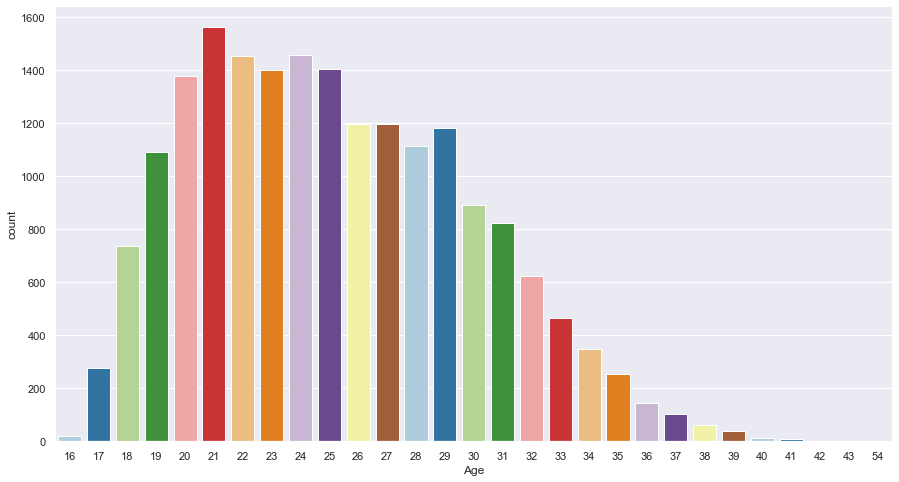

In [13]:
# Frequency distribution of age of players
# df['Age'].hist(bins=10, legend= True)
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=df_select, x='Age', palette='Paired')

Most of the players are from 20-29 of age bucket.

<AxesSubplot:xlabel='Growth', ylabel='count'>

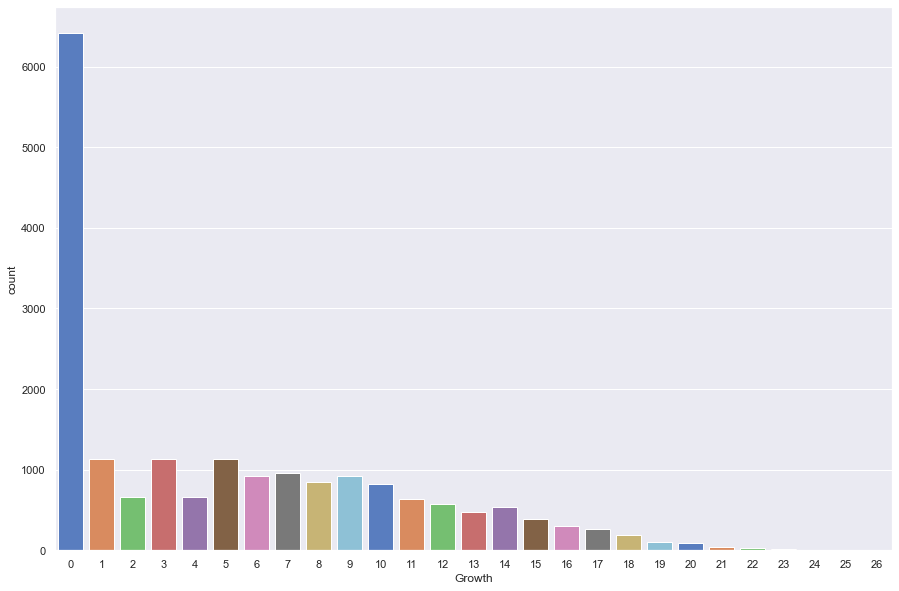

In [14]:
# Frequency distribution of growth of players
# df['Growth'].hist(bins=4)
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df_select, x='Growth', palette='muted')

Text(0, 0.5, 'Count')

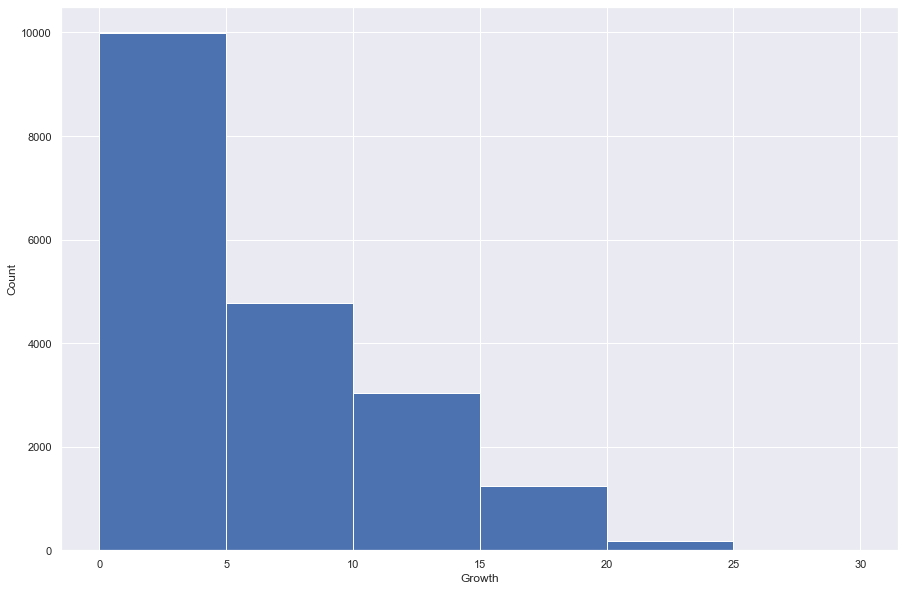

In [15]:
ax = df['Growth'].hist(bins=[0.,5.,10.,15.,20.,25.,30.])
ax.set_xlabel('Growth')
ax.set_ylabel('Count')

We see a good number of players with exceptional growths (>10). 

In [16]:
# Frequency of Growth values 
df_select.groupby('Growth', as_index= False).agg(count= ('Age', 'count'))

Growth  count
0        0   6423
1        1   1132
2        2    656
3        3   1127
4        4    659
5        5   1138
6        6    923
7        7    956
8        8    843
9        9    924
10      10    817
11      11    640
12      12    571
13      13    471
14      14    540
15      15    383
16      16    302
17      17    265
18      18    194
19      19    106
20      20     96
21      21     36
22      22     27
23      23     19
24      24      4
25      25      6
26      26      2

Text(0, 0.5, 'Growth')

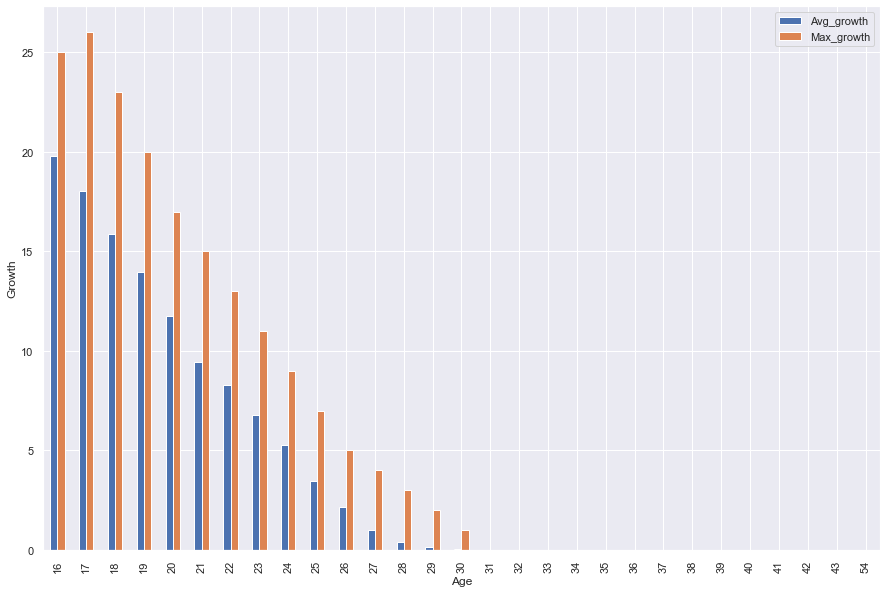

In [17]:
# Age vs Average and max Growth
ax = df_select.groupby('Age', as_index =True).agg(Avg_growth = ('Growth', 'mean'),\
                                        Max_growth = ('Growth', 'max')).plot(kind= 'bar')
ax.set_ylabel('Growth',fontsize=12)

As players grow older, their growth rate declines.

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

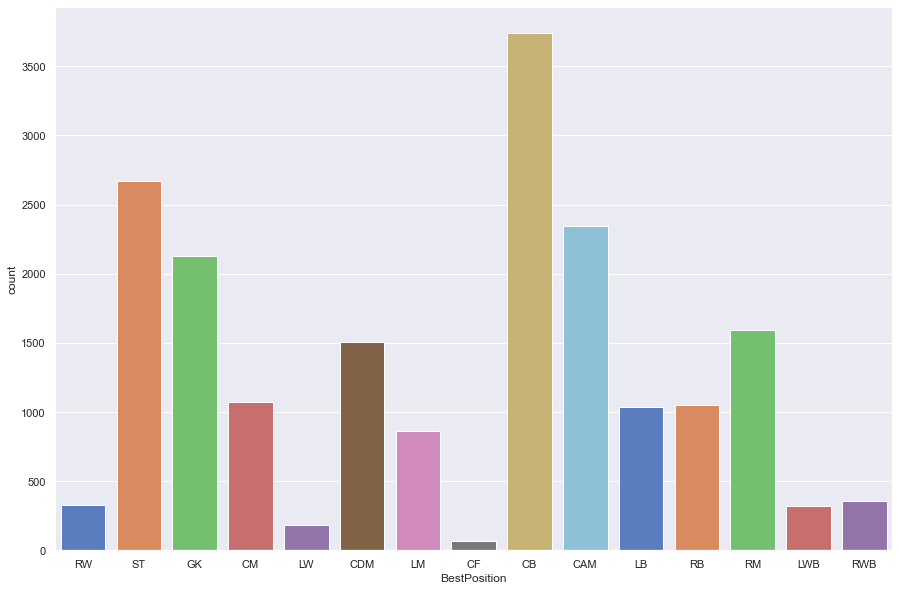

In [18]:
# Frequency distribution of player positions
# df['BestPosition'].hist()
# df['BestPosition'].value_counts().plot(kind='bar')
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df_select, x='BestPosition', palette='muted')

We have a lot of CBs (Centre Back) in our dataset.

Text(0, 0.5, 'Growth')

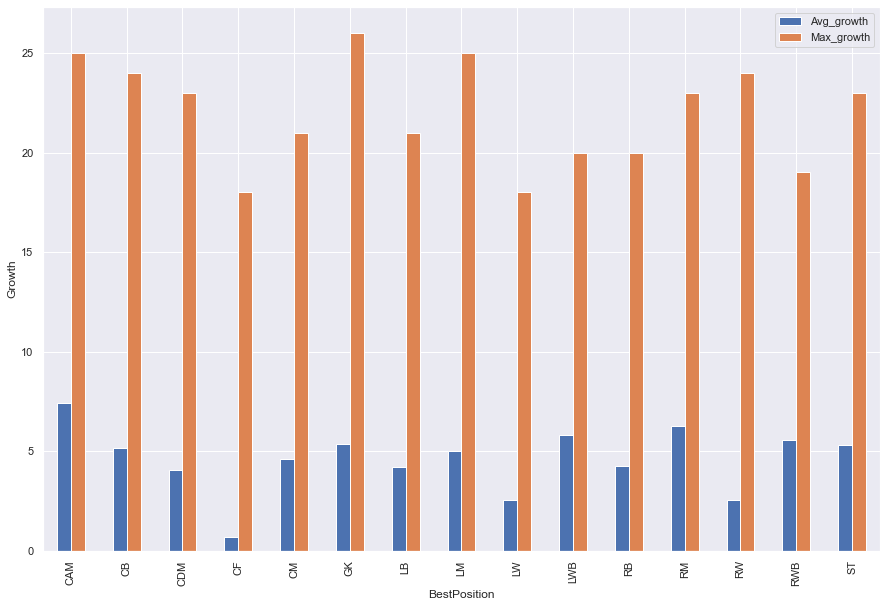

In [19]:
# Player position vs average and max growth
ax = df_select.groupby('BestPosition', as_index =True).agg(Avg_growth = ('Growth', 'mean'),\
                                        Max_growth = ('Growth', 'max')).plot(kind= 'bar')
ax.set_ylabel('Growth',fontsize=12)

GK has the highest growth but CAM has highest average growth.

Text(0, 0.5, 'ValueEUR')

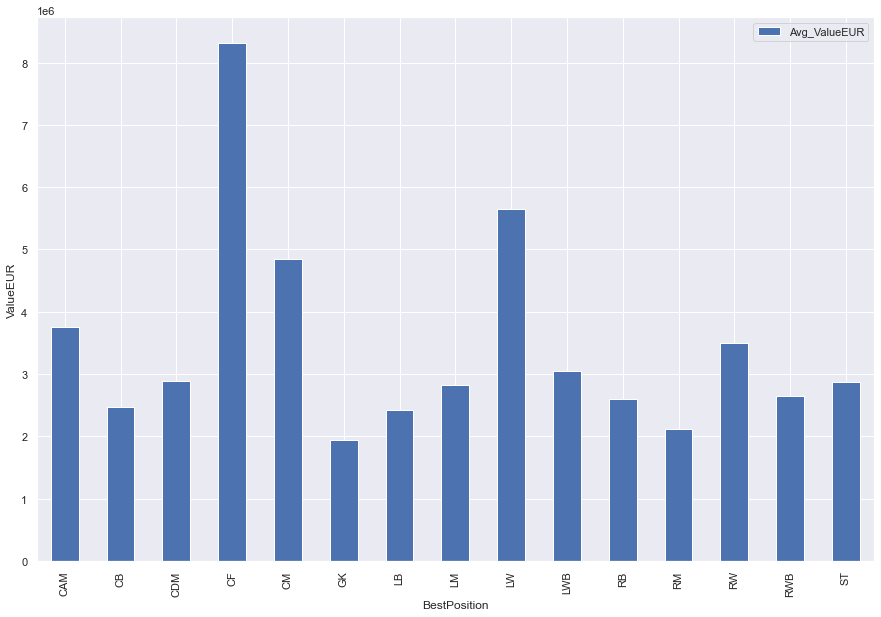

In [20]:
# Player position vs ValueEUR
ax = df_select.groupby('BestPosition', as_index =True)\
.agg(Avg_ValueEUR = ('ValueEUR', 'mean')).plot(kind= 'bar')
ax.set_ylabel('ValueEUR',fontsize=12)

CF (Center Forward) & LW (Left Winger) tend to have higher values (Euro in millions) in the transfer market.

Text(0, 0.5, 'WageEUR')

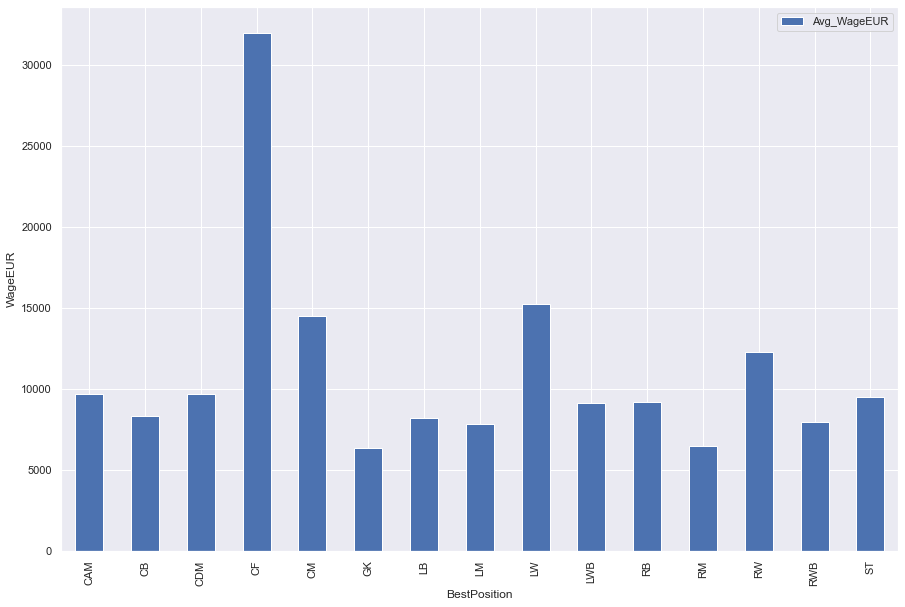

In [21]:
# Player position vs ValueEUR
ax = df_select.groupby('BestPosition', as_index =True)\
.agg(Avg_WageEUR = ('WageEUR', 'mean')).plot(kind= 'bar')
ax.set_ylabel('WageEUR',fontsize=12)

CF (Center Forward) & LW (Left Winger) tend to have higher wages as well.

We are looking for a model that can predict the best position for a player based on all the necessary features.

# Feature selection

In [22]:
# Selecting X and Y axis features
X = df_select.drop(['BestPosition','BestPosition_code'], axis = 1)
Y = df_select['BestPosition_code']
# feature extraction
test = SelectKBest(score_func=f_classif, k=30)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=5)
# print(fit.scores_)
features = fit.transform(X)
# summarize selected features
# print(features[0:5,:])

In [23]:
# Shape of input array
X.shape

(19260, 72)

In [24]:
# Shape of output array of feature selection
features.shape

(19260, 30)

In [25]:
# Displaying feature importance/ scores as a dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

Specs         Score
0                      Age     67.190212
1                   Height    912.986303
2                   Weight    681.242937
3                  Overall     29.575567
4                Potential     35.112654
5                   Growth     56.691974
6               TotalStats   1989.576990
7                BaseStats    215.095352
8                 ValueEUR     16.498515
9                  WageEUR     20.929972
10                WeakFoot    169.077617
11              SkillMoves   1686.724575
12               PaceTotal    703.732257
13           ShootingTotal   1795.707416
14            PassingTotal    626.694386
15          DribblingTotal    882.266955
16          DefendingTotal   3099.881707
17        PhysicalityTotal    495.471704
18                Crossing   2881.065313
19               Finishing   4586.887667
20         HeadingAccuracy   4063.744509
21            ShortPassing   2828.735534
22                 Volleys   2686.880900
23               Dribbling   5306.344167
24                   Curve   2031.415516
25              FKAccuracy   1492.046657
26             LongPassing   1828.268246
27             BallControl   4560.246415
28            Acceleration   2253.688848
29             SprintSpeed   1992.088156
30                 Agility   1896.555687
31               Reactions     80.777536
32                 Balance   1425.678708
33               ShotPower    700.035703
34                 Jumping    320.049905
35                 Stamina   2052.864481
36                Strength    678.973971
37               LongShots   2726.496657
38              Aggression   1654.619595
39           Interceptions   4168.014537
40             Positioning   4847.117368
41                  Vision   1241.076822
42               Penalties   2465.137659
43               Composure    550.788135
44                 Marking   4548.897318
45          StandingTackle   5314.139306
46           SlidingTackle   5543.957641
47                GKDiving  28268.224351
48              GKHandling  27010.305107
49               GKKicking  25348.547488
50           GKPositioning  23830.911432
51              GKReflexes  27603.770319
52                STRating   4098.748788
53                LWRating   4960.968868
54                LFRating   4391.133437
55                CFRating   4391.133437
56                RFRating   4391.133437
57                RWRating   4960.968868
58               CAMRating   4105.480358
59                LMRating   4580.326100
60                CMRating   3268.056334
61                RMRating   4580.326100
62               LWBRating   4834.525933
63               CDMRating   3871.580282
64               RWBRating   4834.525933
65                LBRating   5085.841395
66                CBRating   4639.361814
67                RBRating   5085.841395
68                GKRating  33939.827637
69  AttackingWorkRate_code    356.053992
70  DefensiveWorkRate_code    265.263679
71      PreferredFoot_code    594.286433

In [26]:
# Taking the top 30 features according to their scores for modeling
feature_list = featureScores.sort_values(by = 'Score',\
                ascending = False).head(30)['Specs'].tolist()
# feature_list

In [27]:
# Adding the calculated field needed which will be the predicted variable of our model to the list 
feature_list.append('BestPosition_code')
# remove features which are too similar
feature_list.remove('GKDiving')
feature_list.remove('GKReflexes')
feature_list.remove('GKHandling')
feature_list.remove('GKKicking')
feature_list.remove('GKPositioning')
feature_list

['GKRating',
 'SlidingTackle',
 'StandingTackle',
 'Dribbling',
 'RBRating',
 'LBRating',
 'RWRating',
 'LWRating',
 'Positioning',
 'LWBRating',
 'RWBRating',
 'CBRating',
 'Finishing',
 'LMRating',
 'RMRating',
 'BallControl',
 'Marking',
 'LFRating',
 'CFRating',
 'RFRating',
 'Interceptions',
 'CAMRating',
 'STRating',
 'HeadingAccuracy',
 'CDMRating',
 'BestPosition_code']

In [28]:
final_df = df_select[feature_list]
final_df.head()

GKRating  SlidingTackle  StandingTackle  Dribbling  RBRating  LBRating  \
0        22             24              35         96        64        64   
1        22             19              42         85        64        64   
2        23             24              32         88        63        63   
3        21             32              34         93        66        66   
4        92             18              12         12        35        35   

   RWRating  LWRating  Positioning  LWBRating  RWBRating  CBRating  Finishing  \
0        92        92           93         69         69        53         95   
1        85        85           95         67         67        63         95   
2        88        88           95         66         66        56         95   
3        90        90           92         70         70        57         93   
4        32        32           11         35         35        36         11   

   LMRating  RMRating  BallControl  Marking  LFRating  CFRating  RFRating  \
0        93        93           96       20        93        93        93   
1        87        87           88       35        88        88        88   
2        89        89           88       24        89        89        89   
3        92        92           91       26        90        90        90   
4        38        38           30       27        35        35        35   

   Interceptions  CAMRating  STRating  HeadingAccuracy  CDMRating  \
0             40         93        92               70         67   
1             49         89        92               90         69   
2             29         89        91               90         62   
3             38         92        91               72         66   
4             19         41        36               15         39   

   BestPosition_code  
0                 12  
1                 14  
2                 14  
3                 14  
4                  5

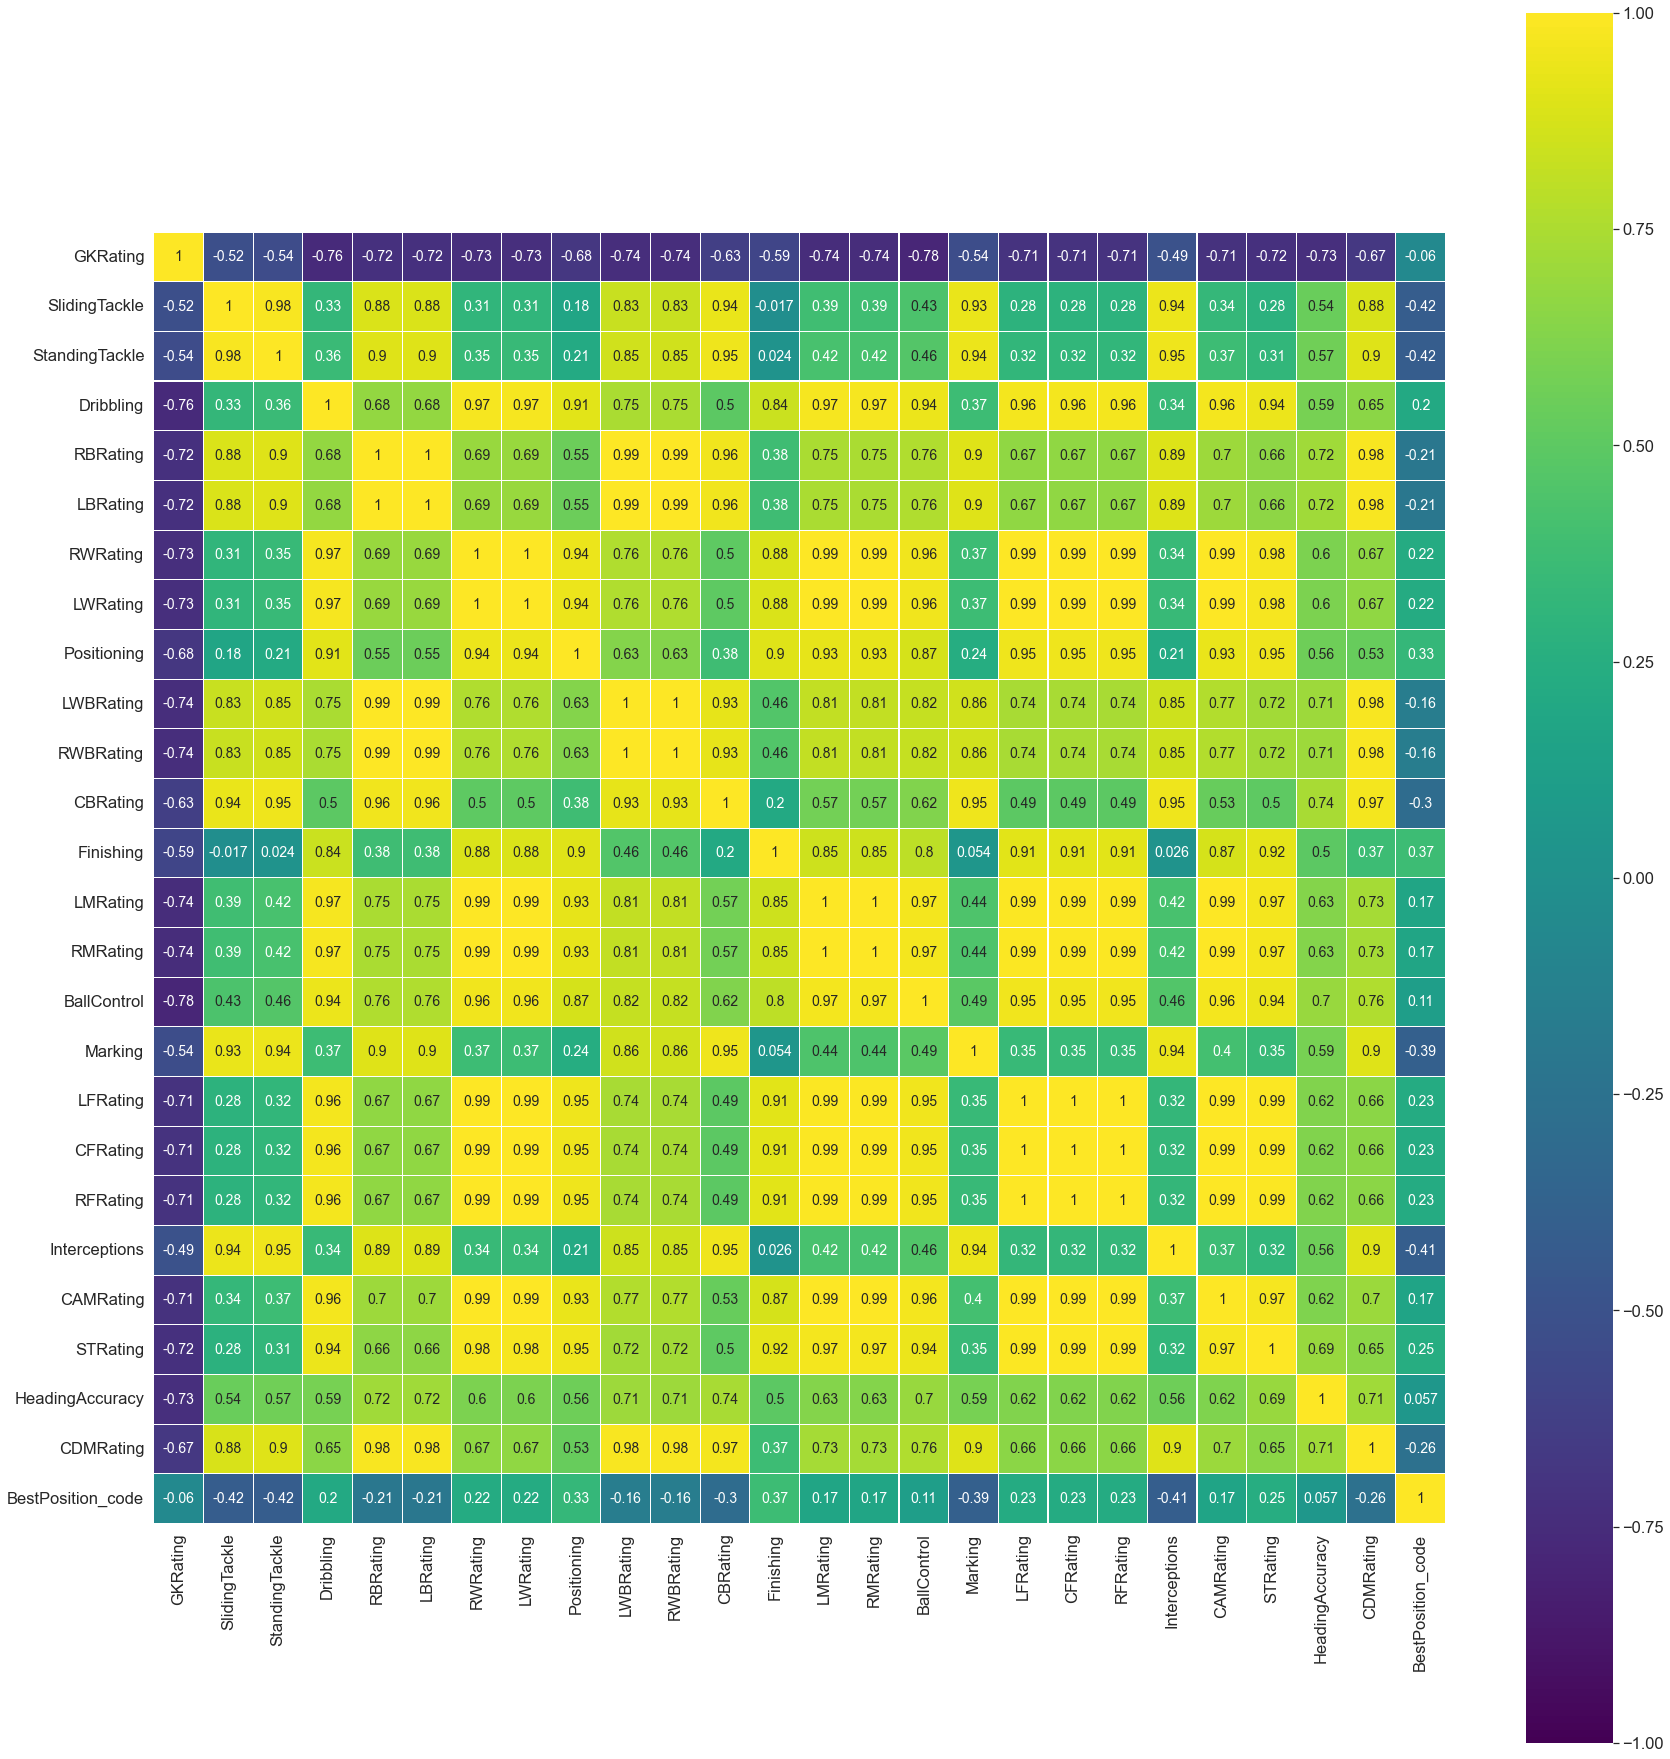

In [32]:
# correlation heatmap
corr = final_df.corr()
plt.figure(figsize=(25, 25))
sns.set(font_scale=1.5)
sns.heatmap(corr
#             [(corr >= 0.6) | (corr <= -0.6)]
            , 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);
plt.tight_layout()
plt.savefig('corr_heatmap_all.png', facecolor='w')

As 'BestPosition_code' is a categorical variable, we do not see any strong correlations with other ratio variables.

# Outlier detection

## Boxplots

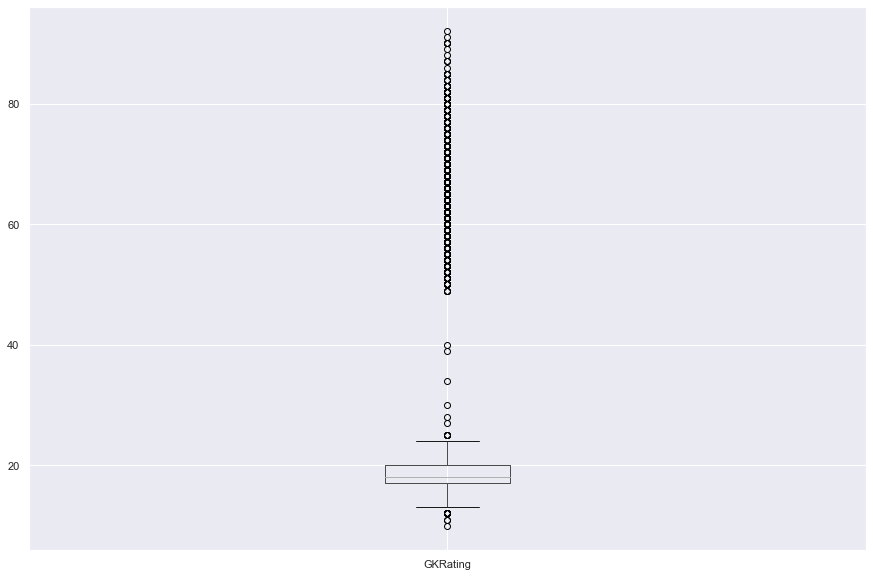

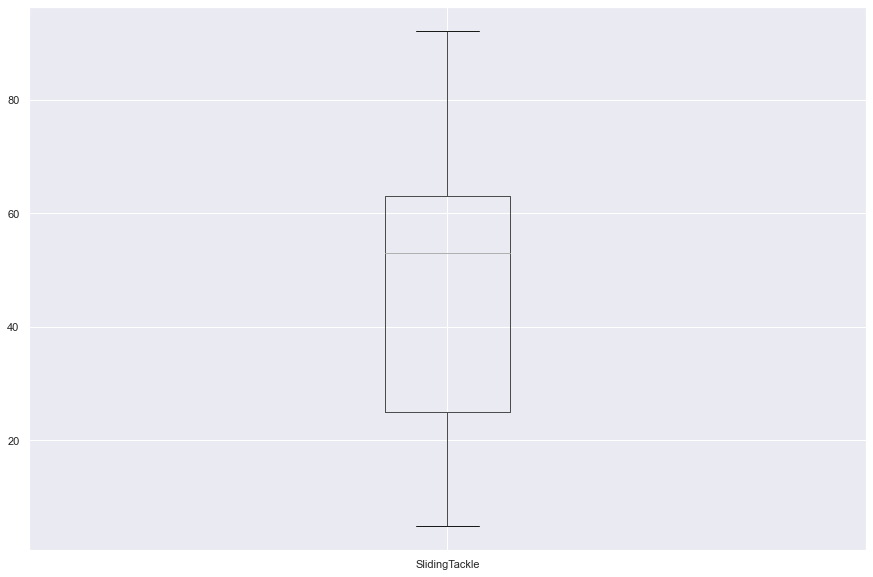

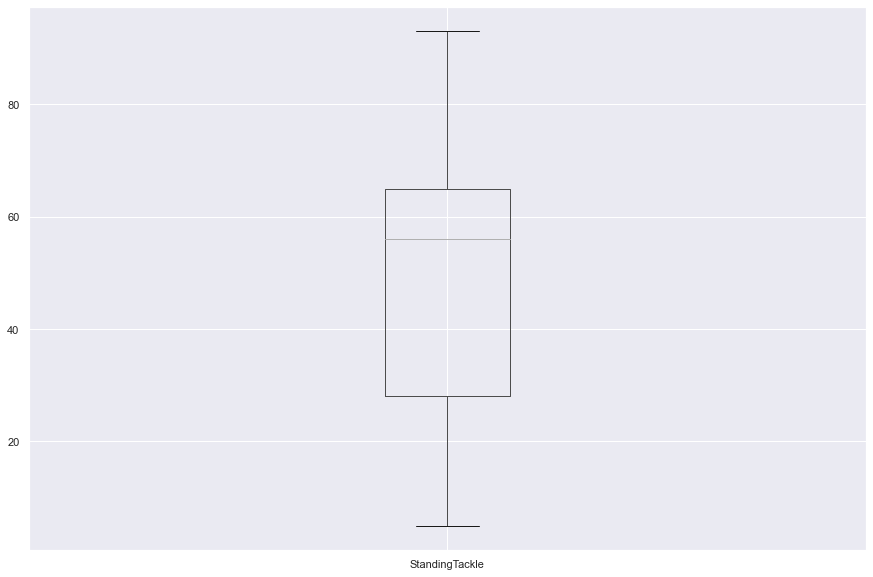

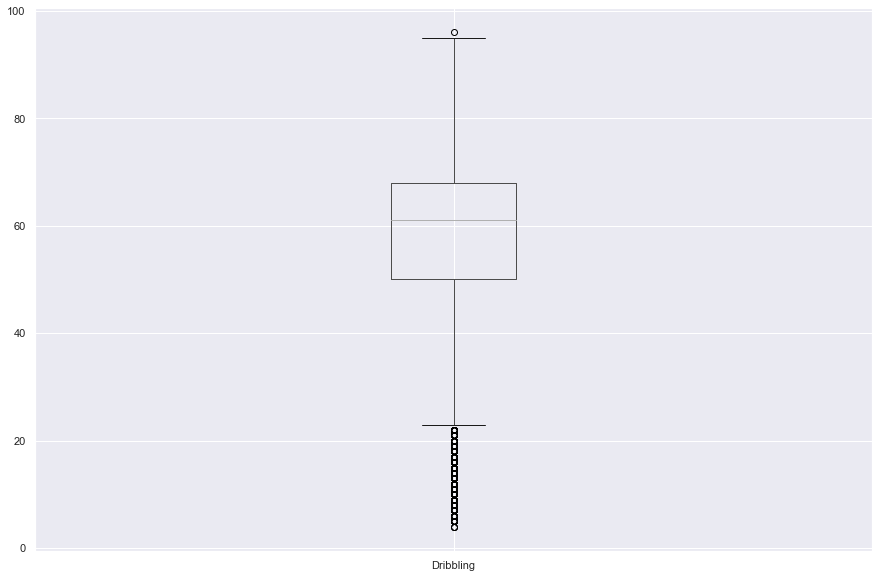

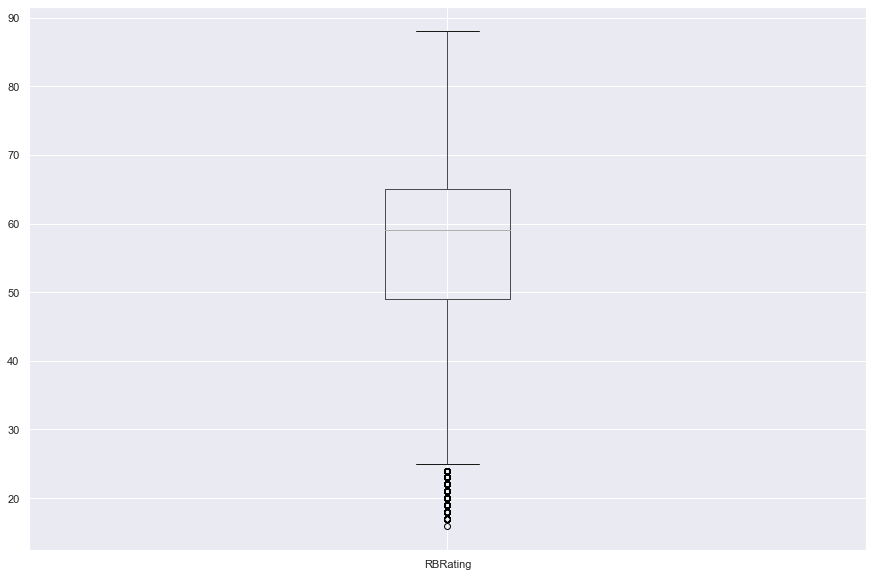

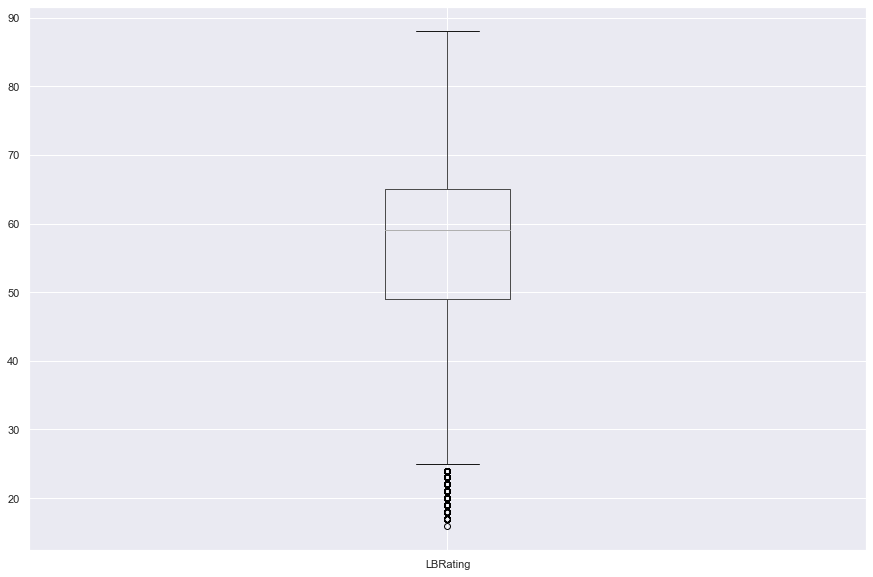

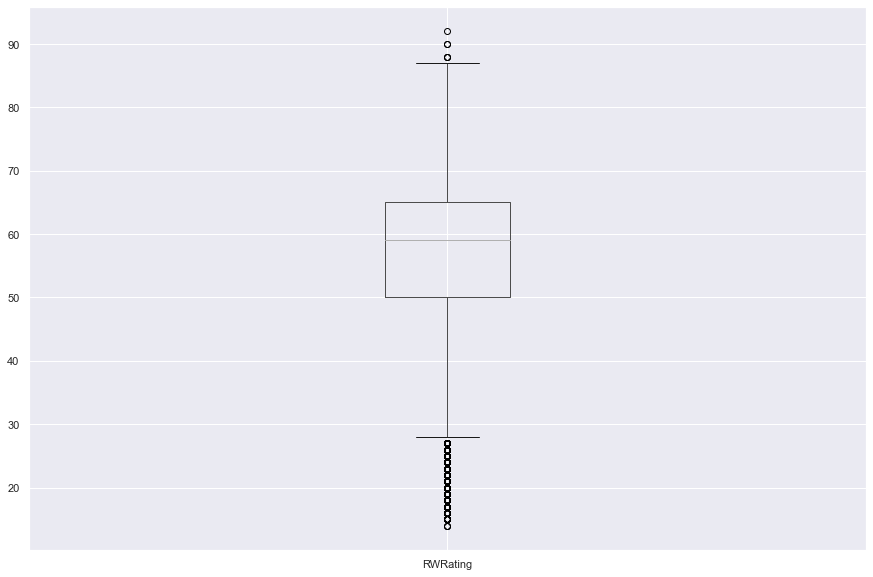

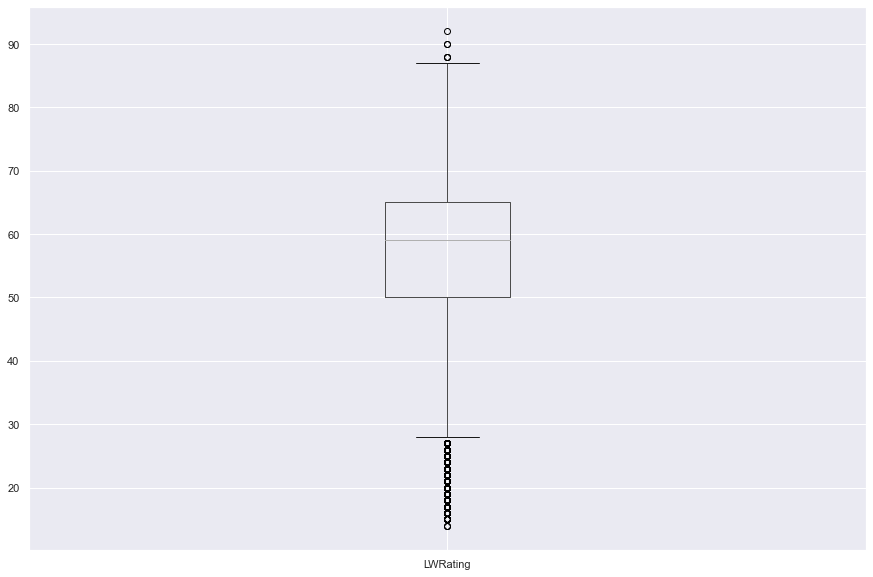

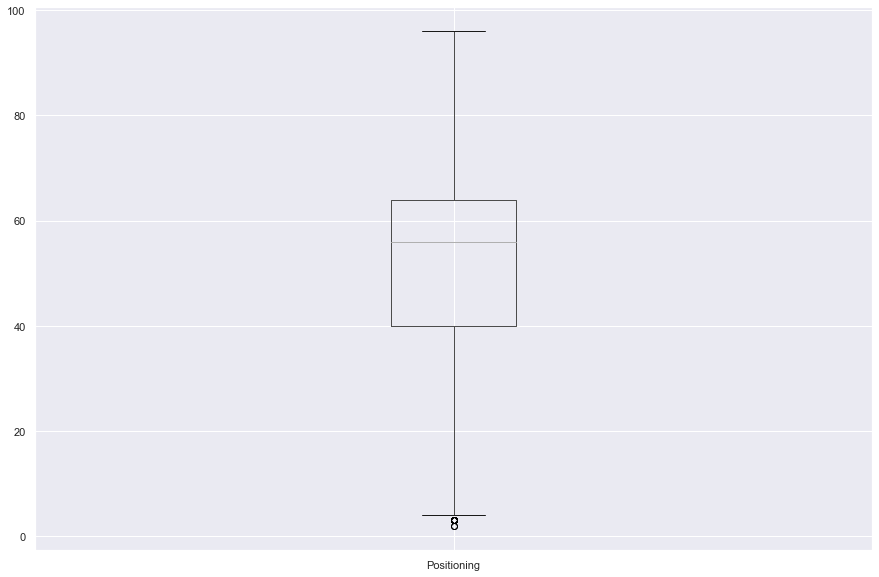

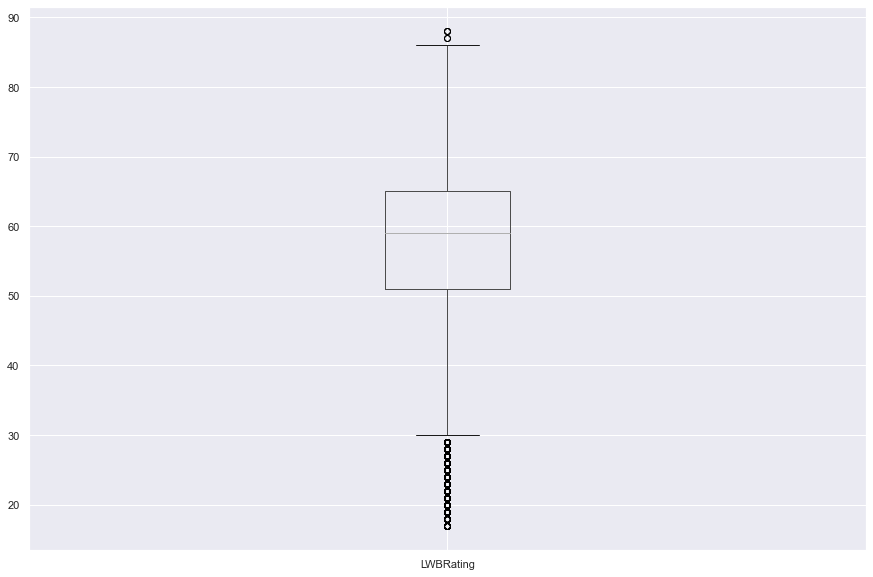

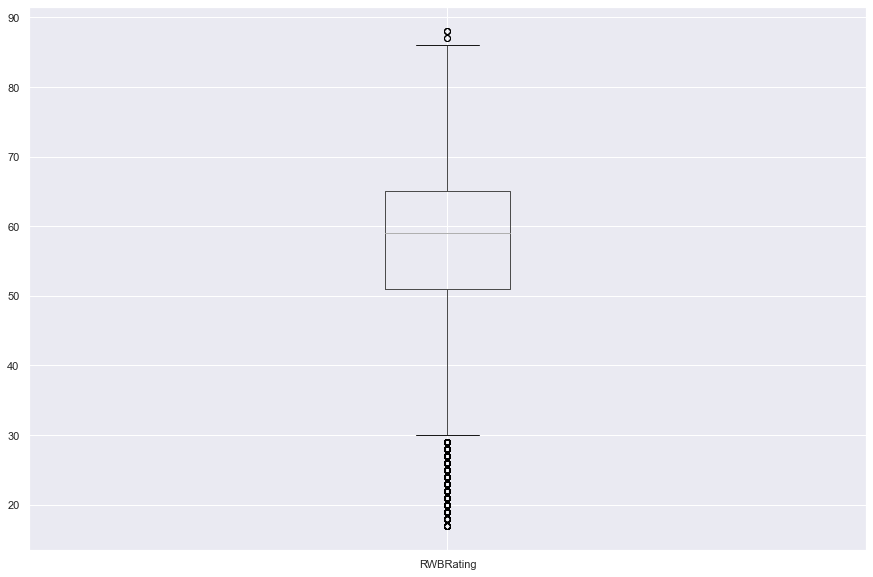

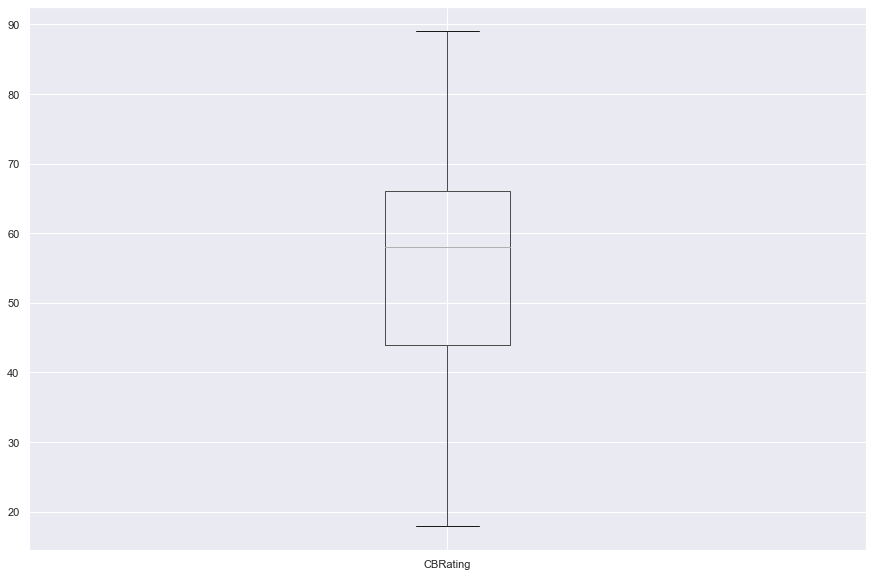

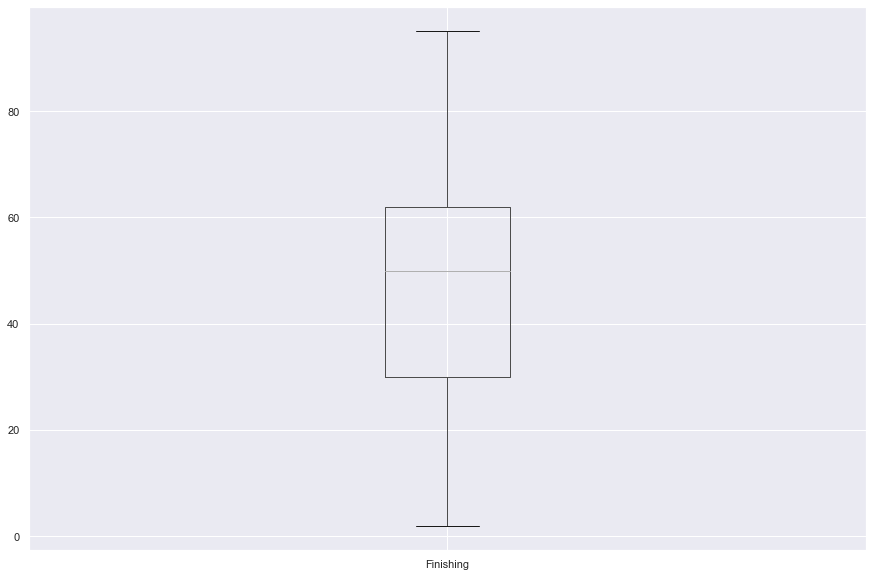

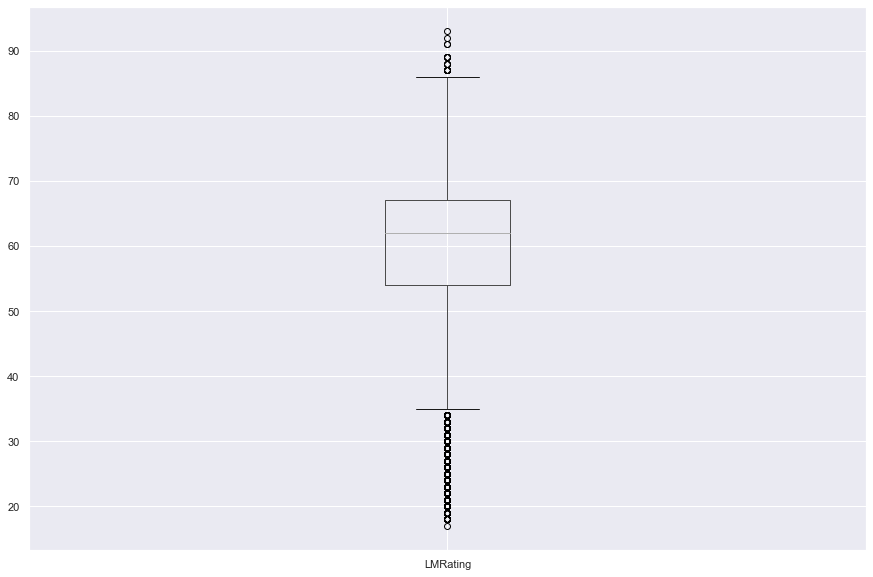

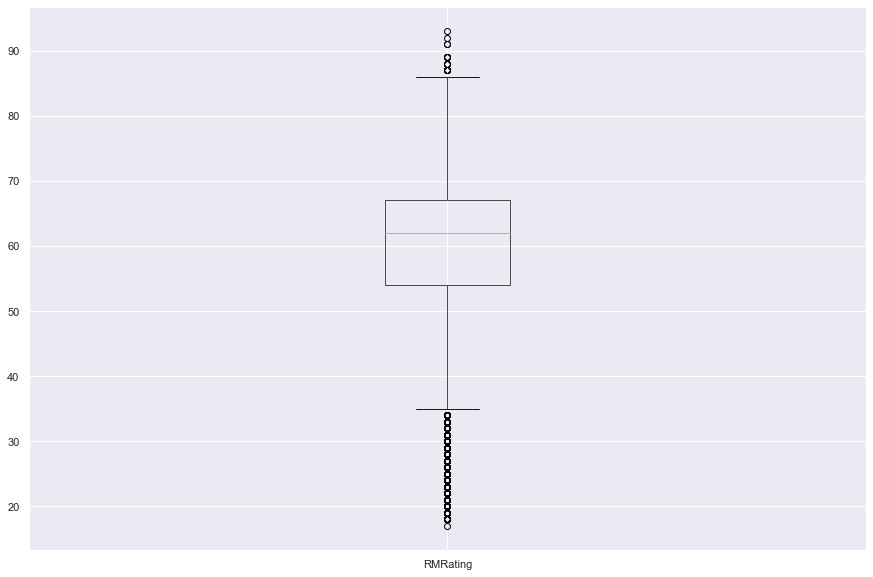

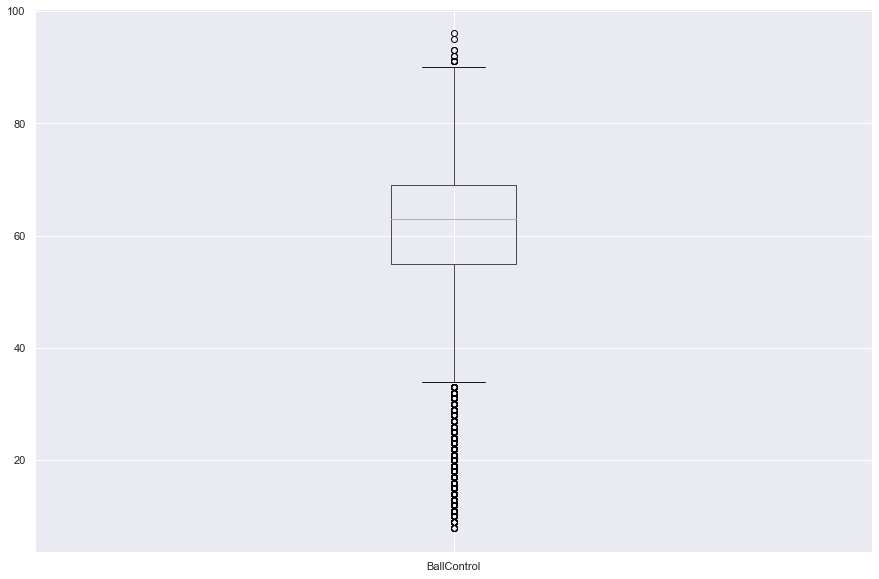

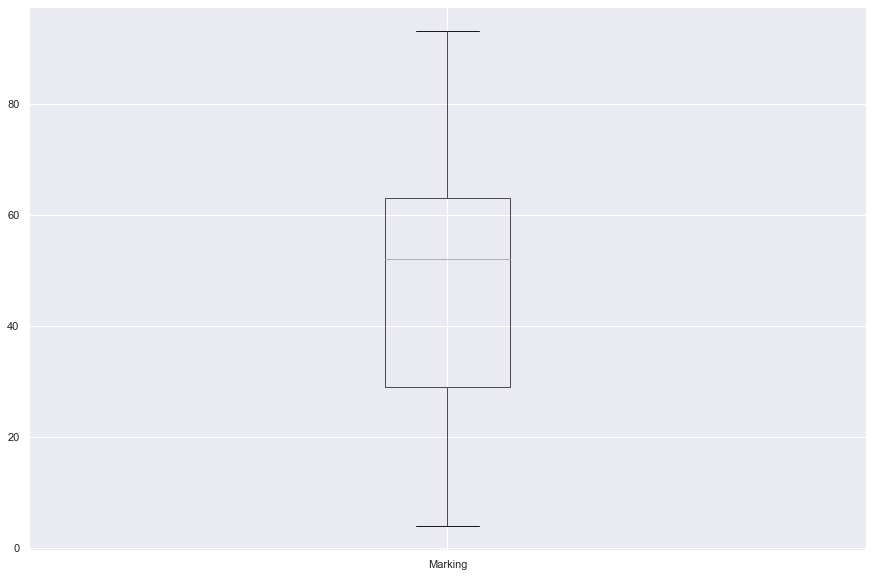

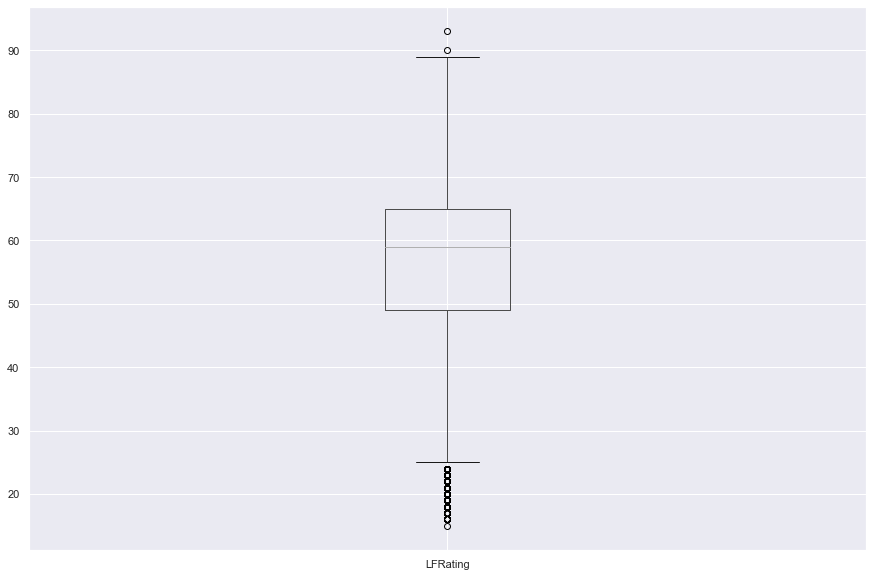

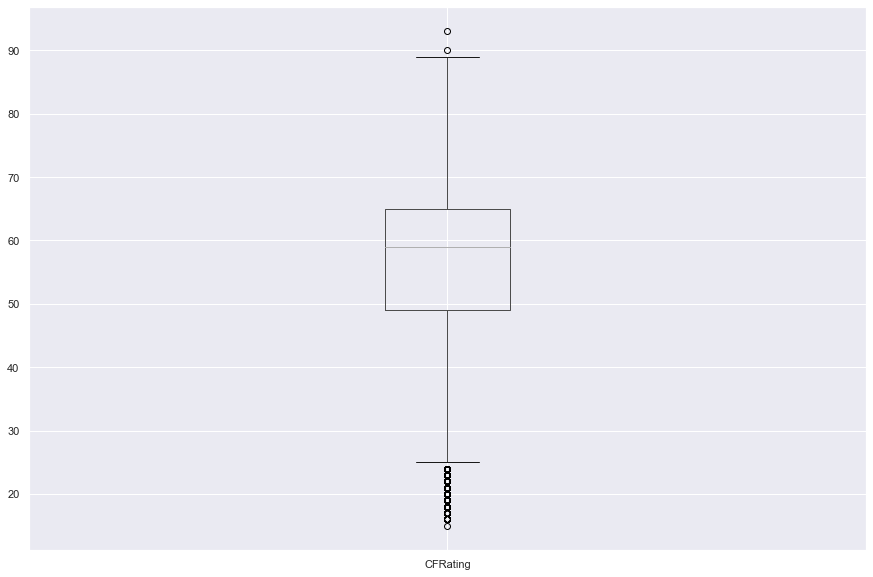

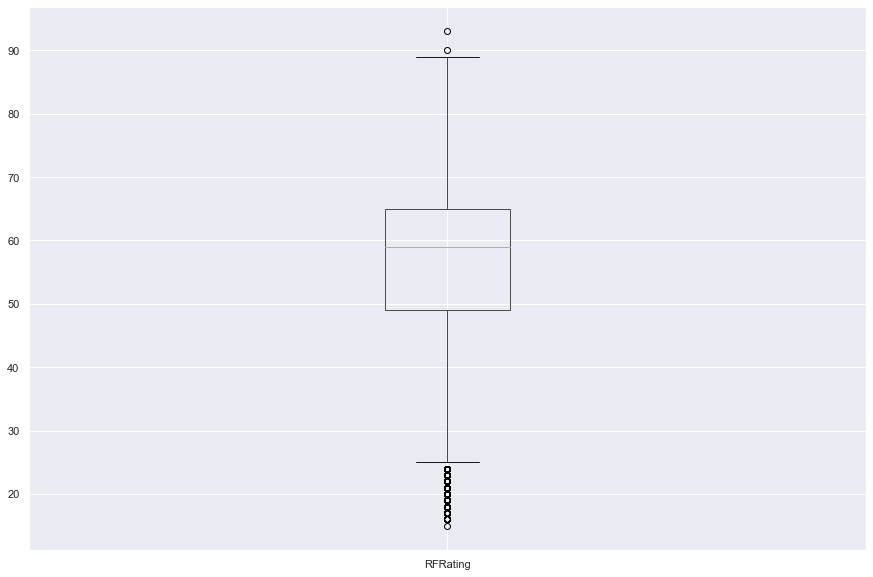

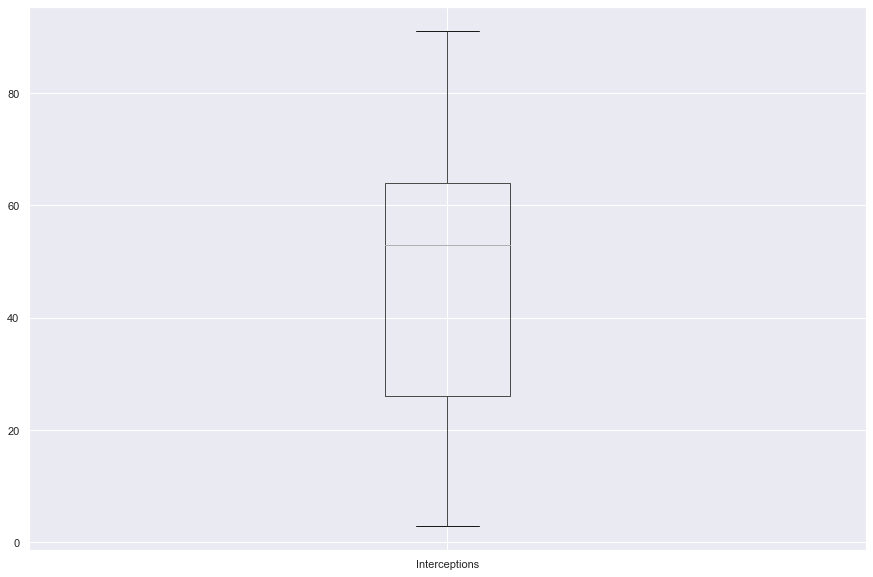

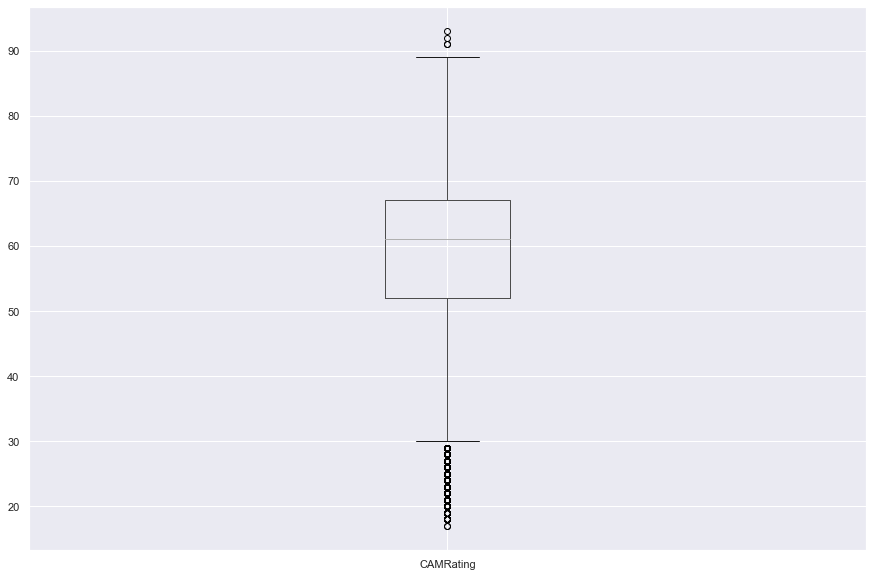

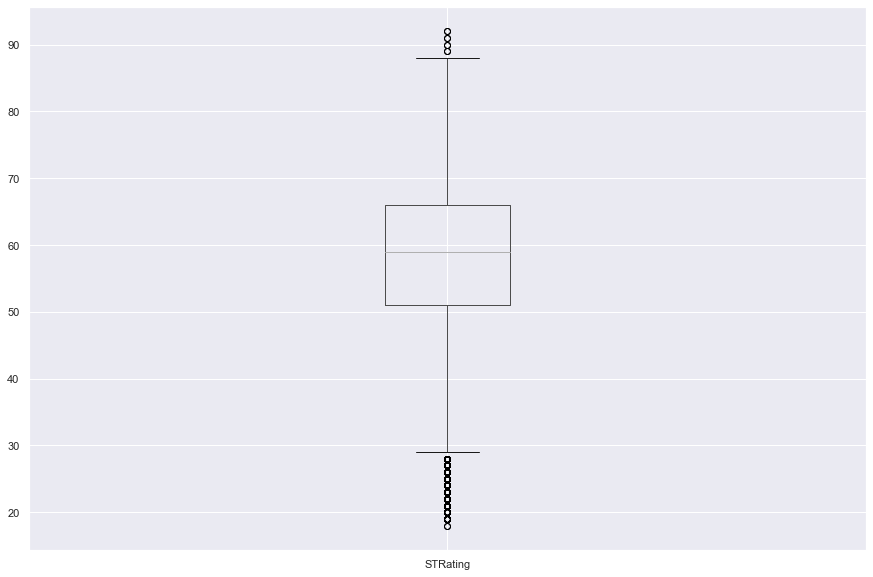

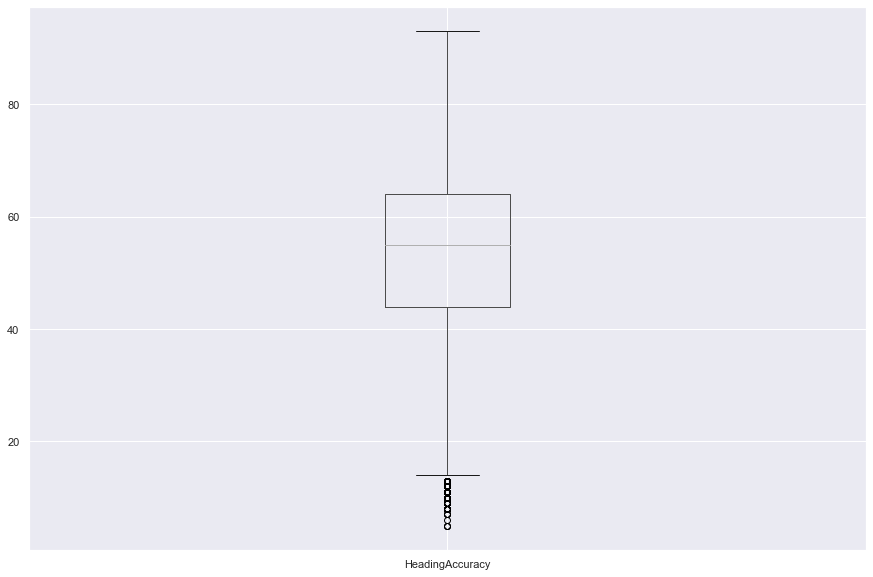

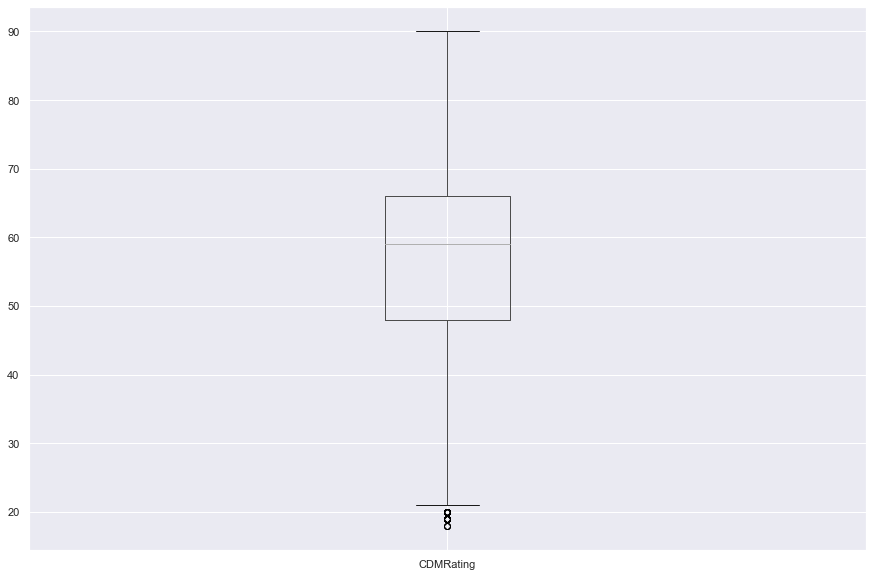

In [30]:
for column in final_df:   
    if column == 'BestPosition_code':
        break
    final_df.boxplot([column])
    plt.show()
    

## DBSCAN

In [33]:
len(final_df.columns)

26

In [31]:
# Scaling the feature data 
X_scaled = StandardScaler().fit_transform(final_df.drop(['BestPosition_code'],\
                                                 axis=1).values)
# As we have 26 columns, using >D+1 rule
neighbors = 27

nbrs = NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
distance_desc = sorted(distances[:,-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc)

In [32]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, 
                      curve="convex", 
                      direction="decreasing")

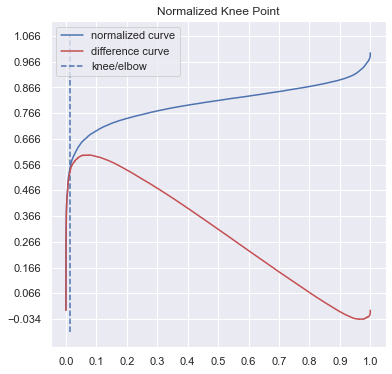

In [33]:
kneedle.plot_knee_normalized()

In [34]:
kneedle.knee_y

1.4080565595824033

According to the graph above,value of eps should be 1.4080565595824033.

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.4080565595824033, min_samples=27).fit(X_scaled)
labels = db.labels_

In [36]:
pd.Series(labels).value_counts()

 1    17118
 0     2123
-1       19
dtype: int64

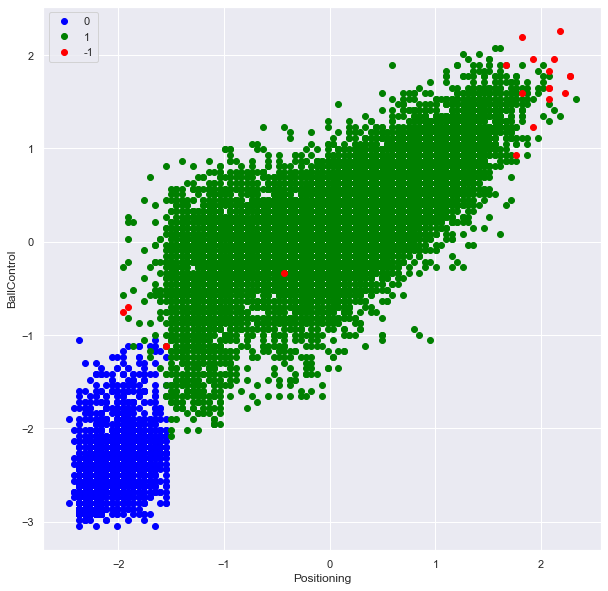

In [37]:
plt.figure(figsize=(10,10))

unique_labels = set(labels)
colors = ['blue','green', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X_scaled[:,8][sample_mask], X_scaled[:, 15][sample_mask], 'o', color=color);
plt.xlabel('Positioning');
plt.ylabel('BallControl');
plt.gca().legend(('0','1','-1'))

According to DBSCAN method, we have 19 outliers in the dataset. We will leave them for now as they are not that drastic.

In [38]:
# Display the outliers
df['Outlier']  = labels
df[df['Outlier'] == -1].reset_index(drop=True)

Name                      FullName  Age  Height  Weight  \
0            L. Messi                  Lionel Messi   34     170      72   
1      R. Lewandowski            Robert Lewandowski   32     185      81   
2   Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   36     187      83   
3           K. Mbappé                 Kylian Mbappé   22     182      73   
4        K. De Bruyne               Kevin De Bruyne   30     181      70   
5           Neymar Jr    Neymar da Silva Santos Jr.   29     175      68   
6             H. Kane                    Harry Kane   27     188      89   
7            M. Neuer                  Manuel Neuer   35     193      93   
8              H. Son                 Heung Min Son   28     183      78   
9            M. Salah                 Mohamed Salah   29     175      71   
10            Ederson     Ederson Santana de Moraes   27     188      86   
11          L. Suárez                   Luis Suárez   34     182      83   
12        R. Sterling               Raheem Sterling   26     170      69   
13          J. Sancho                  Jadon Sancho   21     180      76   
14        L. Martínez              Lautaro Martínez   23     174      72   
15        W. Weghorst                 Wout Weghorst   28     197      84   
16            B. Dost                      Bas Dost   32     196      83   
17         M. Riemann                Manuel Riemann   32     186      83   
18     Jaimosa Cavaco  Jaime Frederico Cavaco Dorta   21     168      60   

                                            PhotoUrl     Nationality  Overall  \
0   https://cdn.sofifa.com/players/158/023/22_60.png       Argentina       93   
1   https://cdn.sofifa.com/players/188/545/22_60.png          Poland       92   
2   https://cdn.sofifa.com/players/020/801/22_60.png        Portugal       91   
3   https://cdn.sofifa.com/players/231/747/22_60.png          France       91   
4   https://cdn.sofifa.com/players/192/985/22_60.png         Belgium       91   
5   https://cdn.sofifa.com/players/190/871/22_60.png          Brazil       91   
6   https://cdn.sofifa.com/players/202/126/22_60.png         England       90   
7   https://cdn.sofifa.com/players/167/495/22_60.png         Germany       90   
8   https://cdn.sofifa.com/players/200/104/22_60.png  Korea Republic       89   
9   https://cdn.sofifa.com/players/209/331/22_60.png           Egypt       89   
10  https://cdn.sofifa.com/players/210/257/22_60.png          Brazil       89   
11  https://cdn.sofifa.com/players/176/580/22_60.png         Uruguay       88   
12  https://cdn.sofifa.com/players/202/652/22_60.png         England       88   
13  https://cdn.sofifa.com/players/233/049/22_60.png         England       87   
14  https://cdn.sofifa.com/players/231/478/22_60.png       Argentina       85   
15  https://cdn.sofifa.com/players/223/689/22_60.png     Netherlands       83   
16  https://cdn.sofifa.com/players/189/068/22_60.png     Netherlands       77   
17  https://cdn.sofifa.com/players/199/339/22_60.png         Germany       74   
18  https://cdn.sofifa.com/players/230/194/22_60.png          Brazil       70   

    Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
0          93       0        2219        462  RW,ST,CF           RW   
1          92       0        2212        460        ST           ST   
2          91       0        2208        457     ST,LW           ST   
3          95       4        2175        470     ST,LW           ST   
4          91       0        2304        485    CM,CAM           CM   
5          91       0        2183        454    LW,CAM           LW   
6          90       0        2205        456        ST           ST   
7          90       0        1534        501        GK           GK   
8          89       0        2142        455  LM,CF,LW           LM   
9          89       0        2211        468        RW           RW   
10         91       2        1583        501        GK           GK   
11         88       0  

So, DBSCAN basically identified the 16 best players at present, 1 youth player and 2 not so good players for their age as outliers.

# K-means clustering

In [39]:
# Scaling the data
X = final_df.values
X_scaler = StandardScaler().fit(X)
X_scaled = X_scaler.transform(X)

In [40]:
wcss = []

# We always assume the max number of cluster would be 10
# You can judge the number of clusters by doing averaging
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

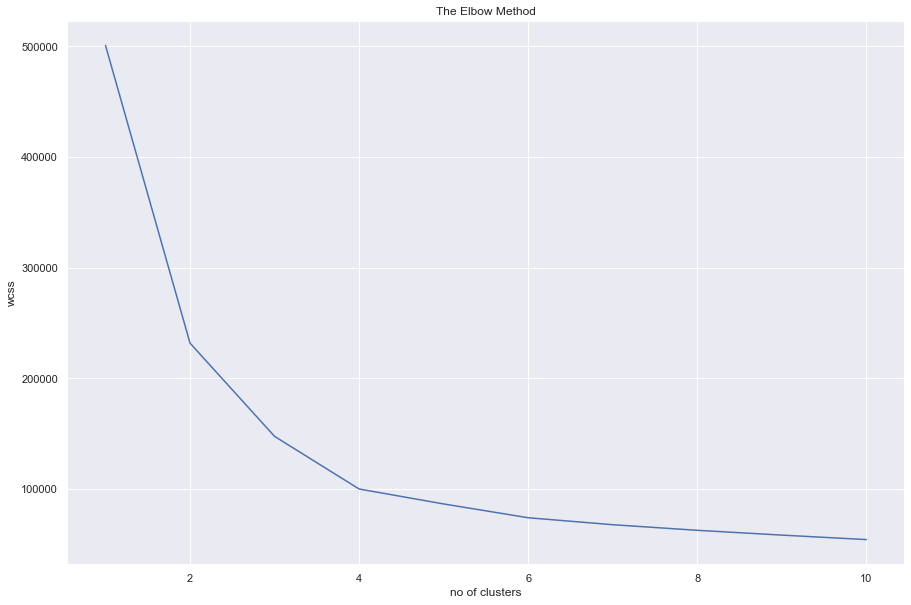

In [41]:
# Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

We see the last elbow bend at n = 4

In [42]:
kmeansmodel = KMeans(n_clusters= 4, random_state=31)
# unsupervised learning
kmeansmodel.fit(X_scaled)
# y_kmeans= kmeansmodel_sup.labels_
# Predict the clusters
y_kmeans = kmeansmodel.predict(X_scaled)

In [43]:
np.unique(y_kmeans, return_counts=True)

(array([0, 1, 2, 3]), array([2126, 6421, 5038, 5675], dtype=int64))

In [44]:
# Inverse scale transform the clusters' centers 
cluster_center = X_scaler.inverse_transform(kmeansmodel.cluster_centers_)
# cluster_center

In [45]:
# for index, i in enumerate(feature_list):
#     print(f'{index} - {i}')

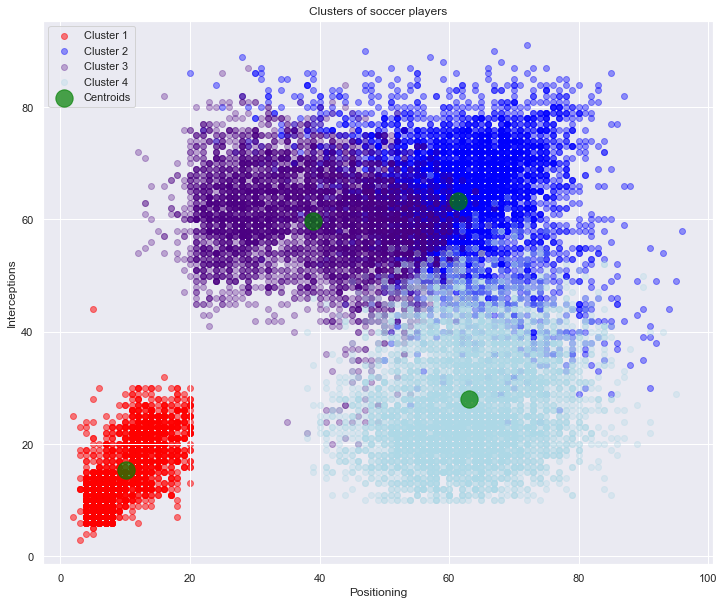

In [46]:
#Visualizing all the clusters 
plt.figure(figsize=(12, 10))
plt.scatter(X[y_kmeans == 0, 8], X[y_kmeans == 0, 20], c = 'red', \
            label = 'Cluster 1', zorder = 0, alpha = .5)
plt.scatter(X[y_kmeans == 1, 8], X[y_kmeans == 1, 20], c = 'blue', \
            label = 'Cluster 2', zorder = 1, alpha = .4)
plt.scatter(X[y_kmeans == 2, 8], X[y_kmeans == 2, 20], c = 'indigo',\
            label = 'Cluster 3', zorder = 2, alpha = .3)
plt.scatter(X[y_kmeans == 3, 8], X[y_kmeans == 3, 20], c = 'lightblue',\
            label = 'Cluster 4', zorder = 3, alpha = .3)
# plot centroids
plt.scatter(cluster_center[:, 8], cluster_center[:, 20], s = 300, c = 'green',\
            zorder = 6, label = 'Centroids', alpha = .7)
plt.title('Clusters of soccer players')
plt.xlabel('Positioning')
plt.ylabel('Interceptions')
plt.legend()
plt.show()

In [47]:
df["Kmean_cluster"] = y_kmeans
df['Kmean_cluster'].value_counts()

1    6421
3    5675
2    5038
0    2126
Name: Kmean_cluster, dtype: int64

# Clusters visualizations

## Cluster 0

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

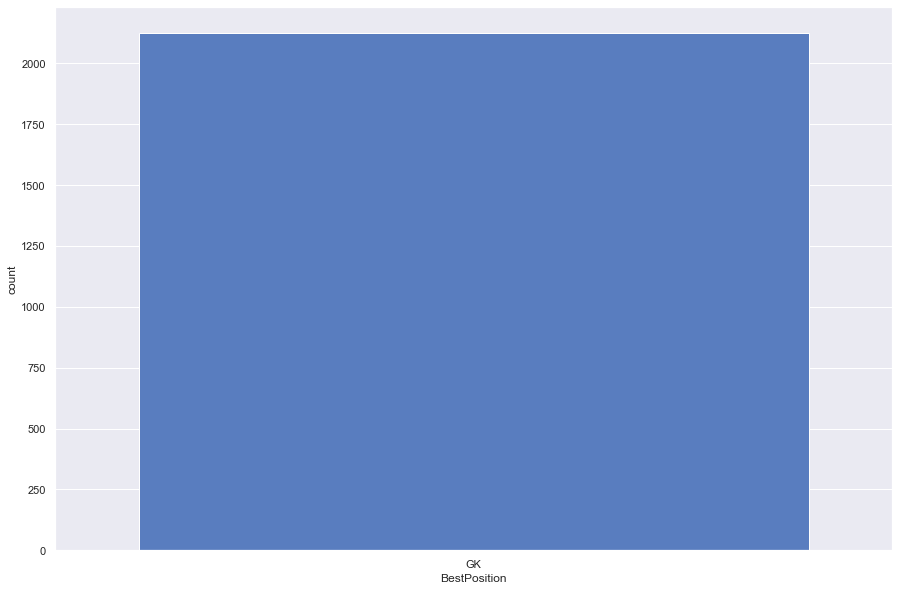

In [48]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df[df['Kmean_cluster'] == 0], x='BestPosition', palette='muted')

In [49]:
df[df['Kmean_cluster'] == 0].head()

Name               FullName  Age  Height  Weight  \
4        J. Oblak              Jan Oblak   28     188      87   
9   M. ter Stegen  Marc-André ter Stegen   29     187      85   
10       M. Neuer           Manuel Neuer   35     193      93   
14    T. Courtois       Thibaut Courtois   29     199      96   
17  G. Donnarumma   Gianluigi Donnarumma   22     196      90   

                                            PhotoUrl Nationality  Overall  \
4   https://cdn.sofifa.com/players/200/389/22_60.png    Slovenia       91   
9   https://cdn.sofifa.com/players/192/448/22_60.png     Germany       90   
10  https://cdn.sofifa.com/players/167/495/22_60.png     Germany       90   
14  https://cdn.sofifa.com/players/192/119/22_60.png     Belgium       89   
17  https://cdn.sofifa.com/players/230/621/22_60.png       Italy       89   

    Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
4          93       2        1413        489        GK           GK   
9          92       2        1444        484        GK           GK   
10         90       0        1534        501        GK           GK   
14         91       2        1327        469        GK           GK   
17         93       4        1377        481        GK           GK   

                   Club   ValueEUR  WageEUR  ReleaseClause ClubPosition  \
4    Atlético de Madrid  112000000   130000      238000000           GK   
9          FC Barcelona   99000000   250000      210400000           GK   
10    FC Bayern München   13500000    86000       22300000           GK   
14       Real Madrid CF   85500000   250000      181700000           GK   
17  Paris Saint-Germain  119500000   110000      230000000           GK   

    ContractUntil  ClubNumber  ClubJoined  OnLoad NationalTeam  \
4          2023.0        13.0        2014   False  Not in team   
9          2025.0         1.0        2014   False  Not in team   
10         2023.0         1.0        2011   False      Germany   
14         2026.0         1.0        2018   False      Belgium   
17         2026.0        50.0        2021   False        Italy   

   NationalPosition  NationalNumber PreferredFoot  IntReputation  WeakFoot  \
4               NaN             NaN         Right              5         3   
9               NaN             NaN         Right              4         4   
10               GK             1.0         Right              5         4   
14               GK             1.0          Left              4         3   
17               GK            21.0         Right              3         3   

    SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  \
4            1            Medium            Medium         87             92   
9            1            Medium            Medium         88             85   
10           1            Medium            Medium         88             88   
14           1            Medium            Medium         84             89   
17           1            Medium            Medium         91             83   

    PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  Crossing  \
4             78              90              52                90        13   
9             88              90              45                88        18   
10            91              88              57                89        15   
14            74              88              48                86        14   
17            79              90              53                85        12   

    Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
4          11               15            43       13         12     13   
9          14               11            61       14         21     18   
10         13               25            60       11         30     14   
14         14               13            33       12         13     19   
17         12               12            36        8         28     12   

  

Only Goalkeepers were selected in this cluster.

## Cluster 1

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

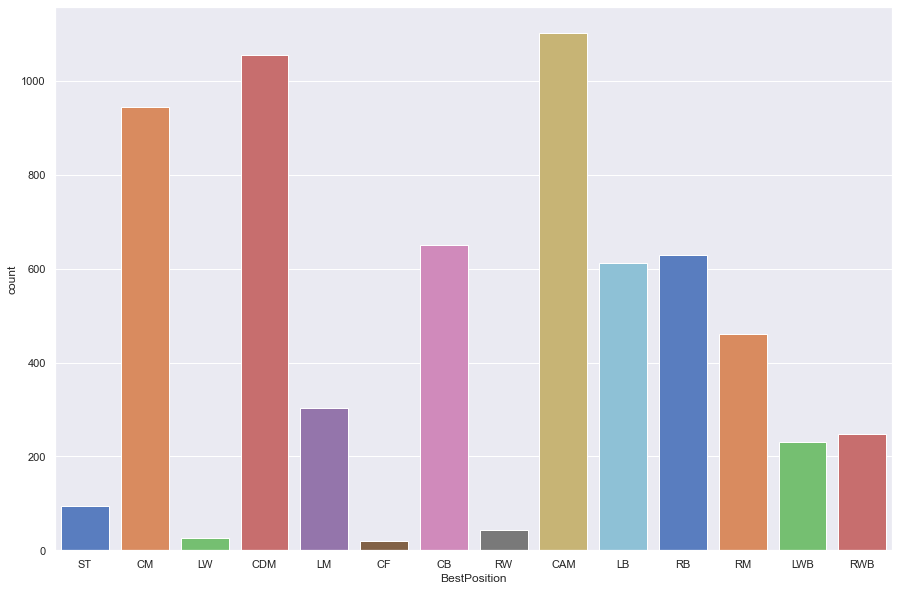

In [50]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df[df['Kmean_cluster'] == 1], x='BestPosition', palette='muted')

In [51]:
df[df['Kmean_cluster'] == 1].head()

Name                    FullName  Age  Height  Weight  \
1  R. Lewandowski          Robert Lewandowski   32     185      81   
3       K. Mbappé               Kylian Mbappé   22     182      73   
5    K. De Bruyne             Kevin De Bruyne   30     181      70   
6       Neymar Jr  Neymar da Silva Santos Jr.   29     175      68   
7        N. Kanté                N'Golo Kanté   30     168      70   

                                           PhotoUrl Nationality  Overall  \
1  https://cdn.sofifa.com/players/188/545/22_60.png      Poland       92   
3  https://cdn.sofifa.com/players/231/747/22_60.png      France       91   
5  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium       91   
6  https://cdn.sofifa.com/players/190/871/22_60.png      Brazil       91   
7  https://cdn.sofifa.com/players/215/914/22_60.png      France       90   

   Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
1         92       0        2212        460        ST           ST   
3         95       4        2175        470     ST,LW           ST   
5         91       0        2304        485    CM,CAM           CM   
6         91       0        2183        454    LW,CAM           LW   
7         90       0        2179        470    CDM,CM          CDM   

                  Club   ValueEUR  WageEUR  ReleaseClause ClubPosition  \
1    FC Bayern München  119500000   270000      197200000           ST   
3  Paris Saint-Germain  194000000   230000      373500000           ST   
5      Manchester City  125500000   350000      232200000           CM   
6  Paris Saint-Germain  129000000   270000      238700000           LW   
7              Chelsea  100000000   230000      185000000           CM   

   ContractUntil  ClubNumber  ClubJoined  OnLoad NationalTeam  \
1         2023.0         9.0        2014   False       Poland   
3         2022.0         7.0        2018   False       France   
5         2025.0        17.0        2015   False      Belgium   
6         2025.0        10.0        2017   False  Not in team   
7         2023.0         7.0        2016   False       France   

  NationalPosition  NationalNumber PreferredFoot  IntReputation  WeakFoot  \
1               ST             9.0         Right              5         4   
3               LW            10.0         Right              4         4   
5               CM             7.0         Right              4         5   
6              NaN             NaN         Right              5         5   
7              CDM            13.0         Right              4         3   

   SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  \
1           4              High            Medium         78             92   
3           5              High               Low         97             88   
5           4              High              High         76             86   
6           5              High            Medium         91             83   
7           2            Medium              High         78             66   

   PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  Crossing  \
1            79              85              44                82        71   
3            80              92              36                77        78   
5            93              88              64                78        94   
6            86              94              37                63        85   
7            75              81              87                83        68   

   Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
1         95               90            85       89         85     79   
3         93               72            85       83         93     80   
5         82               55            94       82         88     85   
6         83               63            86       86         95     88   
7         65               54            82       56         79     49   

   FKAccuracy  LongP

In [52]:
df[df['Kmean_cluster'] == 1].describe()

Age       Height       Weight      Overall    Potential  \
count  6421.000000  6421.000000  6421.000000  6421.000000  6421.000000   
mean     26.351347   179.232363    73.363962    69.714530    73.196698   
std       4.239875     5.810578     5.898683     5.574778     5.924953   
min      16.000000   158.000000    51.000000    57.000000    59.000000   
25%      23.000000   175.000000    70.000000    66.000000    69.000000   
50%      26.000000   179.000000    73.000000    69.000000    73.000000   
75%      29.000000   183.000000    77.000000    73.000000    77.000000   
max      40.000000   199.000000   100.000000    92.000000    95.000000   

            Growth   TotalStats    BaseStats      ValueEUR        WageEUR  \
count  6421.000000  6421.000000  6421.000000  6.421000e+03    6421.000000   
mean      3.482168  1832.644604   390.870269  5.084487e+06   15145.211026   
std       4.213448   131.619459    26.212863  1.109439e+07   27015.183441   
min       0.000000  1482.000000   320.000000  0.000000e+00       0.000000   
25%       0.000000  1737.000000   372.000000  9.000000e+05    2000.000000   
50%       1.000000  1815.000000   387.000000  1.600000e+06    6000.000000   
75%       6.000000  1919.000000   407.000000  3.700000e+06   16000.000000   
max      23.000000  2341.000000   496.000000  1.940000e+08  350000.000000   

       ReleaseClause  ContractUntil   ClubNumber   ClubJoined  NationalNumber  \
count   6.421000e+03    6391.000000  6391.000000  6421.000000      440.000000   
mean    9.159434e+06    2022.902206    18.619621  2018.999689       12.700000   
std     2.122534e+07       1.243567    16.148685     2.339156        6.905216   
min     0.000000e+00    2021.000000     1.000000  2003.000000        2.000000   
25%     1.300000e+06    2022.000000     8.000000  2018.000000        7.000000   
50%     2.600000e+06    2023.000000    16.000000  2020.000000       13.000000   
75%     6.600000e+06    2024.000000    24.000000  2021.000000       18.000000   
max     3.735000e+08    2031.000000    99.000000  2021.000000       28.000000   

       IntReputation     WeakFoot   SkillMoves    PaceTotal  ShootingTotal  \
count    6421.000000  6421.000000  6421.000000  6421.000000    6421.000000   
mean        1.177387     3.074910     2.692727    69.706432      57.013394   
std         0.500616     0.645493     0.637942     9.758450       9.925398   
min         1.000000     1.000000     2.000000    28.000000      26.000000   
25%         1.000000     3.000000     2.000000    65.000000      50.000000   
50%         1.000000     3.000000     3.000000    70.000000      57.000000   
75%         1.000000     3.000000     3.000000    76.000000      64.000000   
max         5.000000     5.000000     5.000000    97.000000      92.000000   

       PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  \
count   6421.000000     6421.000000     6421.000000       6421.000000   
mean      64.965893       68.204485       62.544152         68.435913   
std        6.450791        6.016780        8.572167          7.745573   
min       45.000000       48.000000       36.000000         39.000000   
25%       60.000000       64.000000       57.000000         64.000000   
50%       64.000000       67.000000       63.000000         69.000000   
75%       69.000000       72.000000       68.000000         74.000000   
max       93.000000       94.000000       91.000000         90.000000   

          Crossing    Finishing  HeadingAccuracy  ShortPassing      Volleys  \
count  6421.000000  6421.000000      6421.000000   6421.000000  6421.000000   
mean     62.564398    53.809375        57.485750     69.304625    49.683071   
std       9.553071    11.784717        10.407207      6.286342    12.621954   
min      17.000000    17.000000        19.000000     40.000000    12.000000   
25%      57.000000    46.000000        50.000000     65.000000    40.000000   
50%      63.000000    55.000000        57.000000     69.000000    49.000000   
75%      6

Players with good playmaking abilities were selected in this cluster.

## Cluster 2

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

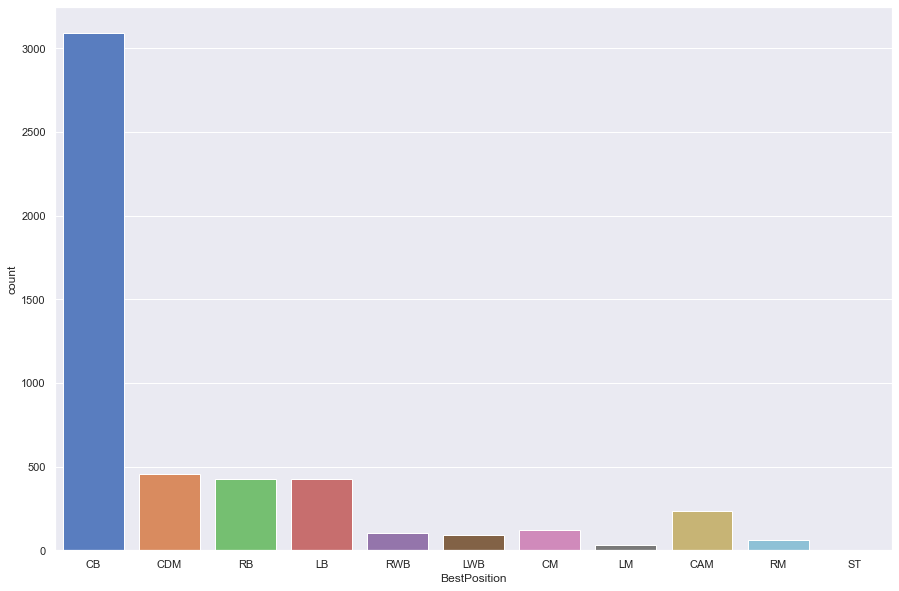

In [53]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df[df['Kmean_cluster'] == 2], x='BestPosition', palette='muted')

In [54]:
df[df['Kmean_cluster'] == 2].head()

Name        FullName  Age  Height  Weight  \
118    S. Savić    Stefan Savić   30     187      80   
150  K. Manolas  Kostas Manolas   30     189      83   
219     N. Süle     Niklas Süle   25     195      99   
306    W. Orban     Willi Orban   28     186      87   
417    J. Evans     Jonny Evans   33     188      77   

                                             PhotoUrl       Nationality  \
118  https://cdn.sofifa.com/players/204/639/22_60.png        Montenegro   
150  https://cdn.sofifa.com/players/192/774/22_60.png            Greece   
219  https://cdn.sofifa.com/players/212/190/22_60.png           Germany   
306  https://cdn.sofifa.com/players/204/638/22_60.png           Hungary   
417  https://cdn.sofifa.com/players/169/588/22_60.png  Northern Ireland   

     Overall  Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
118       84         84       0        1730        375        CB           CB   
150       83         83       0        1652        377        CB           CB   
219       82         87       5        1675        379     CB,RB           CB   
306       81         82       1        1673        355        CB           CB   
417       80         80       0        1729        363        CB           CB   

                   Club  ValueEUR  WageEUR  ReleaseClause ClubPosition  \
118  Atlético de Madrid  34500000    74000       70700000           CB   
150              Napoli  30000000    80000       51000000           CB   
219   FC Bayern München  40500000    78000       69900000           CB   
306          RB Leipzig  24500000    79000       43500000           CB   
417      Leicester City  10000000    95000       19000000          SUB   

     ContractUntil  ClubNumber  ClubJoined  OnLoad      NationalTeam  \
118         2024.0        15.0        2015   False       Not in team   
150         2024.0        44.0        2019   False       Not in team   
219         2022.0         4.0        2017   False           Germany   
306         2025.0         4.0        2015   False           Hungary   
417         2023.0         6.0        2018   False  Northern Ireland   

    NationalPosition  NationalNumber PreferredFoot  IntReputation  WeakFoot  \
118              NaN             NaN         Right              2         3   
150              NaN             NaN         Right              3         2   
219               CB            15.0         Right              3         3   
306               CB             6.0         Right              2         3   
417               CB             5.0         Right              2         4   

     SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  \
118           2            Medium              High         64             35   
150           2               Low            Medium         81             25   
219           2            Medium            Medium         65             42   
306           2            Medium            Medium         49             36   
417           2            Medium              High         52             32   

     PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  Crossing  \
118            57              56              87                76        35   
150            44              61              85                81        27   
219            59              49              83                81        34   
306            52              54              84                80        39   
417            61              58              83                77        52   

     Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
118         34               84            73       27         47     34   
150         25               80            65       16         54     30   
219         22               84            78       33         43     28   
306         38               85            69       31         52     28   
417         28               

Players with good defending abilities were selected in this cluster.

## Cluster 3

<AxesSubplot:xlabel='BestPosition', ylabel='count'>

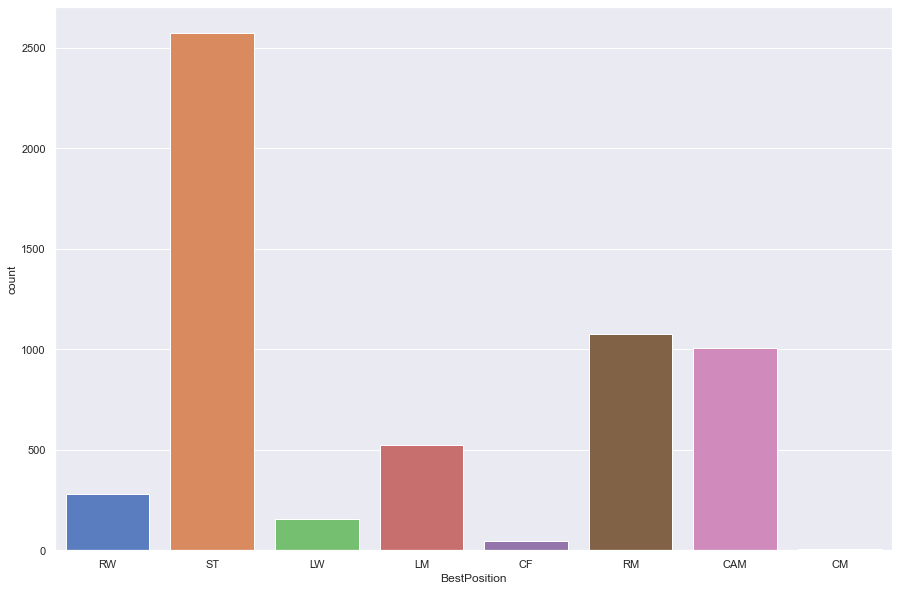

In [55]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.countplot(data=df[df['Kmean_cluster'] == 3], x='BestPosition', palette='muted')

In [56]:
df[df['Kmean_cluster'] == 3].head()

Name                      FullName  Age  Height  Weight  \
0            L. Messi                  Lionel Messi   34     170      72   
2   Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   36     187      83   
22          R. Lukaku                 Romelu Lukaku   28     191      94   
35        C. Immobile                 Ciro Immobile   31     185      85   
44          S. Agüero                 Sergio Agüero   33     173      70   

                                            PhotoUrl Nationality  Overall  \
0   https://cdn.sofifa.com/players/158/023/22_60.png   Argentina       93   
2   https://cdn.sofifa.com/players/020/801/22_60.png    Portugal       91   
22  https://cdn.sofifa.com/players/192/505/22_60.png     Belgium       88   
35  https://cdn.sofifa.com/players/192/387/22_60.png       Italy       87   
44  https://cdn.sofifa.com/players/153/079/22_60.png   Argentina       87   

    Potential  Growth  TotalStats  BaseStats Positions BestPosition  \
0          93       0        2219        462  RW,ST,CF           RW   
2          91       0        2208        457     ST,LW           ST   
22         88       0        2064        445        ST           ST   
35         87       0        2065        437        ST           ST   
44         87       0        2068        424        ST           ST   

                   Club  ValueEUR  WageEUR  ReleaseClause ClubPosition  \
0   Paris Saint-Germain  78000000   320000      144300000           RW   
2     Manchester United  45000000   270000       83300000           ST   
22              Chelsea  93500000   260000      173000000           ST   
35                Lazio  67500000   125000      114800000           ST   
44         FC Barcelona  51000000   260000      104600000           ST   

    ContractUntil  ClubNumber  ClubJoined  OnLoad NationalTeam  \
0          2023.0        30.0        2021   False    Argentina   
2          2023.0         7.0        2021   False     Portugal   
22         2026.0         9.0        2021   False      Belgium   
35         2025.0        17.0        2016   False        Italy   
44         2023.0        19.0        2021   False    Argentina   

   NationalPosition  NationalNumber PreferredFoot  IntReputation  WeakFoot  \
0                RW            10.0          Left              5         4   
2                ST             7.0         Right              5         4   
22               ST             9.0          Left              4         4   
35               ST            17.0         Right              4         4   
44              SUB             9.0         Right              4         4   

    SkillMoves AttackingWorkRate DefensiveWorkRate  PaceTotal  ShootingTotal  \
0            4            Medium               Low         85             92   
2            5              High               Low         87             94   
22           3            Medium            Medium         84             87   
35           3              High            Medium         86             87   
44           4              High            Medium         71             89   

    PassingTotal  DribblingTotal  DefendingTotal  PhysicalityTotal  Crossing  \
0             91              95              34                65        85   
2             80              87              34                75        87   
22            74              78              39                83        73   
35            67              81              39                77        55   
44            75              87              33                69        70   

    Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0          95               70            91       88         96     93   
2          95               90            80       86         88     81   
22         92               89            77       78         83     78   
35         91               81            80       85         80     70   
44         93         

Players with finishing (better goal scoring abilities) were selected in this cluster.

# Decision tree

In [57]:
final_df.columns

Index(['GKRating', 'SlidingTackle', 'StandingTackle', 'Dribbling', 'RBRating',
       'LBRating', 'RWRating', 'LWRating', 'Positioning', 'LWBRating',
       'RWBRating', 'CBRating', 'Finishing', 'LMRating', 'RMRating',
       'BallControl', 'Marking', 'LFRating', 'CFRating', 'RFRating',
       'Interceptions', 'CAMRating', 'STRating', 'HeadingAccuracy',
       'CDMRating', 'BestPosition_code'],
      dtype='object')

In [58]:
x= final_df.drop('BestPosition_code', axis=1).values 
y = final_df['BestPosition_code'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [60]:
%%time
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(final_df.columns))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(final_df):
        f_train = final_df.loc[train_fold] # Extract train data with cv indices
        f_valid = final_df.loc[valid_fold] # Extract valid data with cv indices
        # We fit the model with the fold train data
        model = tree_model.fit(X = f_train.drop('BestPosition_code', axis=1), 
                               y = f_train["BestPosition_code"]) 
        # We calculate accuracy with the fold validation data
        valid_acc = model.score(X = f_valid.drop('BestPosition_code', axis=1), 
                                y = f_valid["BestPosition_code"])
        
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df_ = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df_ = df_[["Max Depth", "Average Accuracy"]]
print(df_.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.304777
         2          0.384216
         3          0.437902
         4          0.495327
         5          0.522897
         6          0.533022
         7          0.549585
         8          0.566199
         9          0.570561
        10          0.572015
        11          0.575026
        12          0.579699
        13          0.572482
        14          0.572170
        15          0.564174
        16          0.564071
        17          0.560021
        18          0.558463
        19          0.557788
        20          0.556282
        21          0.556957
        22          0.554154
        23          0.555244
        24          0.552544
        25          0.552129
        26          0.555296
Wall time: 48.7 s


So, at max_depth = 12 we get the highest average accuracy.

In [61]:
%%time
# Create Decision Tree with max_depth = 12
decision_tree = tree.DecisionTreeClassifier(max_depth = 12)
decision_tree.fit(X_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

Wall time: 150 ms


In [62]:
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

74.9

In [63]:
round(decision_tree.score(X_test, y_test) * 100, 2)

61.85

Wall time: 9.11 s


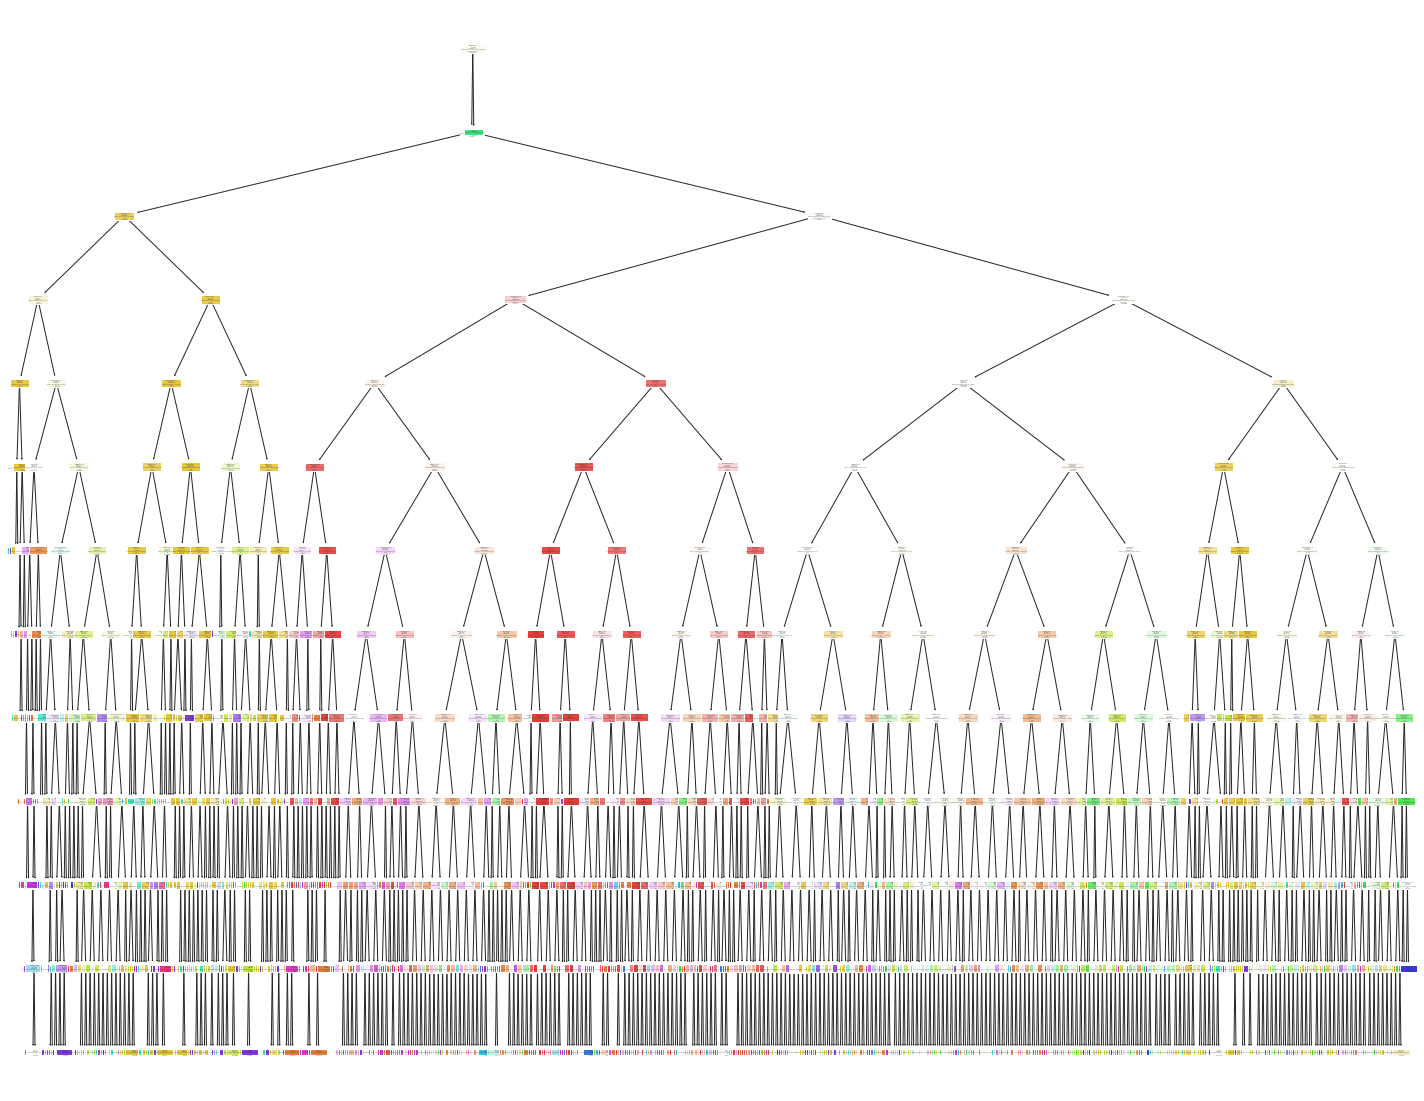

In [64]:
%%time
# Decision tree diagram
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=final_df.columns[:-1],  
                   class_names=sorted(df['BestPosition'].unique()),
                   filled=True)

In [65]:
print(confusion_matrix(y_test, y_pred))

[[369   1   8   3  57   0   5  28   4   1   4  82   0   0  30]
 [  3 801  59   0   7   0  21   0   0   1  24   0   0   0   0]
 [  4  40 221   0  45   0  28   3   0   4  16   6   0   0   0]
 [  6   0   0   0   0   0   0   2   0   0   0   0   0   0   6]
 [ 46   1  52   0 135   0  12   4   0   0  13  11   0   0   0]
 [  0   0   0   0   0 491   0   0   0   0   0   0   0   0   0]
 [  2  31  38   0  21   0 100   2   0  11  52  13   0   3   1]
 [ 67   0   2   0  12   0   5  25   3   1   4  95   4   0  10]
 [ 15   0   0   0   0   0   0   2   2   0   0  20   3   0   6]
 [  3   2  20   0   7   0  28   1   0   9   8   3   0   2   0]
 [  2  33  50   0  20   0 104   2   0   3  42   6   0   2   0]
 [123   2   6   0  26   0   8  26   1   1   3 164   6   1  21]
 [ 24   0   0   2   0   0   0   2   4   0   0  37   5   0  24]
 [  4   3  14   0   4   0  39   4   0  10   9   0   0   1   0]
 [ 21   2   1   2   2   0   1   6   1   0   0  36   5   0 613]]


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58       592
           1       0.87      0.87      0.87       916
           2       0.47      0.60      0.53       367
           3       0.00      0.00      0.00        14
           4       0.40      0.49      0.44       274
           5       1.00      1.00      1.00       491
           6       0.28      0.36      0.32       274
           7       0.23      0.11      0.15       228
           8       0.13      0.04      0.06        48
           9       0.22      0.11      0.15        83
          10       0.24      0.16      0.19       264
          11       0.35      0.42      0.38       388
          12       0.22      0.05      0.08        98
          13       0.11      0.01      0.02        88
          14       0.86      0.89      0.88       690

    accuracy                           0.62      4815
   macro avg       0.40      0.38      0.38      4815
weighted avg       0.60   

So, our decision tree model has ~62% accuracy.

Also, the tree diagram is huge and hard to decipher. So I looked for alternative classification approaches.

# Random Forest Classifier

In [127]:
df_select = df.select_dtypes(include=['int8','int64', 'object'])
df_select.drop(['ReleaseClause','ClubJoined','IntReputation', 'Outlier',\
                'BestPosition_code', 'Name', 'FullName', 'PhotoUrl', 'Nationality', 'Positions',\
                'Club', 'ClubPosition', 'NationalTeam',\
                'NationalPosition', 'PreferredFoot', 'AttackingWorkRate',\
                'DefensiveWorkRate'], axis =1, inplace = True)
df_select.dropna(axis = 0, how = 'any', inplace = True)
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 0 to 19259
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     19260 non-null  int64 
 1   Height                  19260 non-null  int64 
 2   Weight                  19260 non-null  int64 
 3   Overall                 19260 non-null  int64 
 4   Potential               19260 non-null  int64 
 5   Growth                  19260 non-null  int64 
 6   TotalStats              19260 non-null  int64 
 7   BaseStats               19260 non-null  int64 
 8   BestPosition            19260 non-null  object
 9   ValueEUR                19260 non-null  int64 
 10  WageEUR                 19260 non-null  int64 
 11  WeakFoot                19260 non-null  int64 
 12  SkillMoves              19260 non-null  int64 
 13  PaceTotal               19260 non-null  int64 
 14  ShootingTotal           19260 non-null  int64 
 15  Pa

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-bbfcfd7c60e6>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
# Set features. This will also be used as x values.
X= df_select.drop('BestPosition', axis=1) 
y = df_select['BestPosition'].values
print(X.shape, y.shape)

(19260, 72) (19260,)


In [129]:
# Split data into training and testing groups and scale data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [130]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [71]:
%%time
# Fit the data into model
rfm = RandomForestClassifier(n_estimators=200, random_state=1)
rfm.fit(X_train_scaled, y_train)

Wall time: 12.2 s


RandomForestClassifier(n_estimators=200, random_state=1)

In [72]:
sorted(zip(rfm.feature_importances_, X.columns), reverse=True)

[(0.03937072849516438, 'HeadingAccuracy'),
 (0.03088083992858602, 'Positioning'),
 (0.029115682494693564, 'SlidingTackle'),
 (0.02845096027642138, 'DefendingTotal'),
 (0.028384859792811072, 'PreferredFoot_code'),
 (0.027428419461633245, 'Crossing'),
 (0.025212558275054524, 'Strength'),
 (0.02379635505843436, 'Marking'),
 (0.02355897534335656, 'StandingTackle'),
 (0.022745920360610745, 'Finishing'),
 (0.0209890034764863, 'GKHandling'),
 (0.019641251321943973, 'LongPassing'),
 (0.01928611472182994, 'Vision'),
 (0.019264118319735474, 'Interceptions'),
 (0.018380237932324534, 'GKReflexes'),
 (0.017183508632533734, 'GKDiving'),
 (0.016940239290922414, 'RWRating'),
 (0.016863811317442155, 'LWBRating'),
 (0.01682542860160604, 'CBRating'),
 (0.016503093730994043, 'ShootingTotal'),
 (0.01641657152279077, 'LWRating'),
 (0.01634596903076295, 'SprintSpeed'),
 (0.016265851976107706, 'Acceleration'),
 (0.016004999730649793, 'PaceTotal'),
 (0.015804105355767324, 'RBRating'),
 (0.014749724900008322, '

In [73]:
predictions = rfm.predict(X_test_scaled)
base_train_accuracy = round(rfm.score(X_train_scaled, y_train)*100,3)
base_test_accuracy = round(rfm.score(X_test_scaled, y_test)*100,3)
print(f"Training Data Score: {base_train_accuracy}")
print(f"Testing Data Score: {base_test_accuracy}")

Training Data Score: 100.0
Testing Data Score: 77.944


In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         CAM       0.66      0.81      0.73       599
          CB       0.91      0.94      0.92       958
         CDM       0.69      0.79      0.74       389
          CF       0.00      0.00      0.00        16
          CM       0.63      0.61      0.62       249
          GK       1.00      1.00      1.00       515
          LB       0.74      0.79      0.77       269
          LM       0.61      0.35      0.44       217
          LW       1.00      0.02      0.04        45
         LWB       0.61      0.16      0.25        70
          RB       0.66      0.78      0.71       260
          RM       0.60      0.62      0.61       376
          RW       0.31      0.05      0.09        79
         RWB       0.57      0.15      0.23        88
          ST       0.89      0.94      0.91       685

    accuracy                           0.78      4815
   macro avg       0.66      0.53      0.54      4815
weighted avg       0.77   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Hyperparameter Tuning

### No need to run the next 4 blocks as it takes nearly 30 mins to execute!!!

In [75]:
# Get randomforest params
# rfm.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [76]:
# Create the GridSearchCV model
# param_grid = {
#     'n_estimators': [200, 600, 1200, 100],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }
# grid = GridSearchCV(rfm, param_grid, cv=3, verbose=0)

In [77]:
# %%time
# Train the model with GridSearch
# grid.fit(X_train, y_train)

# Output
# GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
#              param_grid={'criterion': ['gini', 'entropy'],
#                          'max_features': ['auto', 'sqrt', 'log2'],
#                          'n_estimators': [200, 600, 1200, 1800]})

Wall time: 0 ns


In [78]:
# print(grid.best_params_)
# print(grid.best_score_)

# Output
# {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1200}
# 0.7752855659397716

### Run from here

In [79]:
%%time
# Creating model using the tuned parameters
rfm_tuned = RandomForestClassifier(n_estimators=1200,criterion= 'gini',\
                             max_features= 'auto', random_state=1)
rfm_tuned.fit(X_train_scaled, y_train)

Wall time: 1min 10s


RandomForestClassifier(n_estimators=1200, random_state=1)

In [80]:
predictions = rfm_tuned.predict(X_test_scaled)
tuned_train_accuracy = round(rfm_tuned.score(X_train_scaled, y_train)*100,3)
tuned_test_accuracy = round(rfm_tuned.score(X_test_scaled, y_test)*100,3)
print(f"Training Data Score: {tuned_train_accuracy}")
print(f"Testing Data Score: {tuned_test_accuracy}")

Training Data Score: 100.0
Testing Data Score: 78.152


In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         CAM       0.66      0.80      0.73       599
          CB       0.91      0.93      0.92       958
         CDM       0.68      0.80      0.74       389
          CF       0.00      0.00      0.00        16
          CM       0.63      0.64      0.64       249
          GK       1.00      1.00      1.00       515
          LB       0.74      0.80      0.77       269
          LM       0.61      0.36      0.45       217
          LW       1.00      0.02      0.04        45
         LWB       0.50      0.11      0.19        70
          RB       0.67      0.76      0.71       260
          RM       0.61      0.62      0.62       376
          RW       0.42      0.06      0.11        79
         RWB       0.52      0.12      0.20        88
          ST       0.89      0.95      0.92       685

    accuracy                           0.78      4815
   macro avg       0.66      0.53      0.54      4815
weighted avg       0.77   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [82]:
print(f"Actual Labels: {list(y_test[:5])}")
print(f"Predicted Labels: {predictions[:5]}")

Actual Labels: ['ST', 'CDM', 'RM', 'LM', 'CM']
Predicted Labels: ['ST' 'CDM' 'RM' 'ST' 'CM']


# Model evaluation

In [83]:
evaluations = {'': ['Base Train Model', 'Base Test Model', 'Tuned Train Model', 'Tuned Test Model'],
               'RF Accuracy': [f"{base_train_accuracy}%", f"{base_test_accuracy}%",\
                               f"{tuned_train_accuracy}%", f"{tuned_test_accuracy}%"]}

evaluations_df = pd.DataFrame(evaluations)
evaluations_df = evaluations_df.set_index('')
evaluations_df

RF Accuracy
                             
Base Train Model       100.0%
Base Test Model       77.944%
Tuned Train Model      100.0%
Tuned Test Model      78.152%

In [84]:
print(f'So our final tuned random forest classifier model has {tuned_test_accuracy}% accuracy.')

So our final tuned random forest classifier model has 78.152% accuracy.


This model has way better accuracy score than the decision tree classifier model.

### Random Forest with PCA

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [132]:
X_train_reduced.shape

(14445, 34)

In [136]:
# Create the GridSearchCV model
param_grid = {
    'n_estimators': [100, 200, 600, 1200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(rfm, param_grid, cv=3, verbose=2)

In [137]:
# %%time
# # Train the model with GridSearch
# grid.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   6.4s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   6.1s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   5.7s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  11.7s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  12.2s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=  12.0s
[CV] END criterion=gini, max_features=auto, n_estimators=600; total time=  38.6s
[CV] END criterion=gini, max_features=auto, n_estimators=600; total time=  44.1s
[CV] END criterion=gini, max_features=auto, n_estimators=600; total time=  42.3s
[CV] END criterion=gini, max_features=auto, n_estimators=1200; total time= 1.5min
[CV] END criterion=gini, max_features=auto, n_estimators=1200; total time= 1.4min
[CV] END criterion=gini, max_features=auto, n_

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=200, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 600, 1200]},
             verbose=2)

In [138]:
# print(grid.best_params_)
# print(grid.best_score_)
# {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1200}
# 0.7462789892696434

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1200}
0.7462789892696434


In [139]:
%%time
# Creating model using the tuned parameters
pca_rfm_tuned = RandomForestClassifier(n_estimators=1200,criterion= 'gini',\
                             max_features= 'auto', random_state=1)
pca_rfm_tuned.fit(X_train_reduced, y_train)

Wall time: 2min 5s


RandomForestClassifier(n_estimators=1200, random_state=1)

In [141]:
predictions = pca_rfm_tuned.predict(X_test_reduced)
pca_train_accuracy = round(pca_rfm_tuned.score(X_train_reduced, y_train)*100,3)
pca_test_accuracy = round(pca_rfm_tuned.score(X_test_reduced, y_test)*100,3)
print(f"Training Data Score: {pca_train_accuracy}")
print(f"Testing Data Score: {pca_test_accuracy}")

Training Data Score: 100.0
Testing Data Score: 76.303


So using PCA on this dataset for random forest classifier model did not give us better accuracy.

# Deep learning

In [85]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X= df_select.drop('BestPosition', axis=1).values 
y = df_select['BestPosition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [86]:
X_train_scaled.shape

(14445, 72)

In [87]:
y_train_categorical.shape

(14445, 15)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
deep_model = Sequential()
# Add first layer
deep_model.add(Dense(units=150, activation='relu', input_dim=72))
# Add second layer (deep)
deep_model.add(Dense(units=300, activation='relu'))
# Add third layer (deep)
deep_model.add(Dense(units=150, activation='relu'))
#  Add output layer
deep_model.add(Dense(units=15, activation='softmax'))

In [89]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               10950     
                                                                 
 dense_1 (Dense)             (None, 300)               45300     
                                                                 
 dense_2 (Dense)             (None, 150)               45150     
                                                                 
 dense_3 (Dense)             (None, 15)                2265      
                                                                 
Total params: 103,665
Trainable params: 103,665
Non-trainable params: 0
_________________________________________________________________


In [90]:
%%time
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
452/452 - 2s - loss: 1.0210 - accuracy: 0.6469 - 2s/epoch - 4ms/step
Epoch 2/100
452/452 - 1s - loss: 0.7095 - accuracy: 0.7407 - 878ms/epoch - 2ms/step
Epoch 3/100
452/452 - 1s - loss: 0.6440 - accuracy: 0.7623 - 984ms/epoch - 2ms/step
Epoch 4/100
452/452 - 1s - loss: 0.6091 - accuracy: 0.7747 - 1s/epoch - 3ms/step
Epoch 5/100
452/452 - 1s - loss: 0.5900 - accuracy: 0.7805 - 917ms/epoch - 2ms/step
Epoch 6/100
452/452 - 1s - loss: 0.5719 - accuracy: 0.7845 - 830ms/epoch - 2ms/step
Epoch 7/100
452/452 - 1s - loss: 0.5599 - accuracy: 0.7907 - 796ms/epoch - 2ms/step
Epoch 8/100
452/452 - 1s - loss: 0.5538 - accuracy: 0.7921 - 880ms/epoch - 2ms/step
Epoch 9/100
452/452 - 1s - loss: 0.5434 - accuracy: 0.7952 - 898ms/epoch - 2ms/step
Epoch 10/100
452/452 - 1s - loss: 0.5402 - accuracy: 0.7966 - 812ms/epoch - 2ms/step
Epoch 11/100
452/452 - 1s - loss: 0.5197 - accuracy: 0.8019 - 822ms/epoch - 2ms/step
Epoch 12/100
452/452 - 1s - loss: 0.5126 - accuracy: 0.8049 - 887ms/epoch - 2ms/

452/452 - 1s - loss: 0.1455 - accuracy: 0.9439 - 996ms/epoch - 2ms/step
Epoch 99/100
452/452 - 1s - loss: 0.1666 - accuracy: 0.9340 - 1s/epoch - 2ms/step
Epoch 100/100
452/452 - 1s - loss: 0.1550 - accuracy: 0.9400 - 1s/epoch - 2ms/step
Wall time: 1min 32s


## Quantify base deep learning model

In [91]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

151/151 - 0s - loss: 0.7872 - accuracy: 0.7954 - 403ms/epoch - 3ms/step
Deep Neural Network - Loss: 0.7871875762939453, Accuracy: 0.7954309582710266


## Make prediction

In [92]:
# Use the first 5 test data values to make a prediction and compare it to the actual labels
prediction = np.argmax(deep_model.predict(X_test_scaled), axis = -1)
predicted_labels = label_encoder.inverse_transform(prediction)
print(f"Actual Labels: {list(y_test[:5])}")
print(f"Predicted Labels: {predicted_labels[:5]}")

Actual Labels: ['ST', 'CDM', 'RM', 'LM', 'CM']
Predicted Labels: ['ST' 'CDM' 'RM' 'LM' 'CAM']


# GridSearchCV on deep learning

In [93]:
# from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import math

In [94]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [102]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train_scaled.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(15, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False) 

<ipython-input-102-d79f6ee12334>:17: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [103]:
activation_funcs = ['sigmoid', 'softmax'] 
loss_funcs = ['categorical_crossentropy']
param_grid = dict(n_layers=[2,3], \
                  first_layer_nodes = [X_train_scaled.shape[1]],\
                  last_layer_nodes = [y_train_categorical.shape[1]],\
                  activation_func = activation_funcs, \
                  loss_func = loss_funcs, epochs = [50,100,200])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [104]:
param_grid

{'n_layers': [2, 3],
 'first_layer_nodes': [72],
 'last_layer_nodes': [15],
 'activation_func': ['sigmoid', 'softmax'],
 'loss_func': ['categorical_crossentropy'],
 'epochs': [50, 100, 200]}

In [105]:
# %%time
# grid.fit(X_train_scaled,y_train_categorical)

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E727222A60>,
             param_grid={'activation_func': ['sigmoid', 'softmax'],
                         'epochs': [50, 100, 200], 'first_layer_nodes': [72],
                         'last_layer_nodes': [15],
                         'loss_func': ['categorical_crossentropy'],
                         'n_layers': [2, 3]})

In [106]:
# print(grid.best_score_)
# print(grid.best_params_)
# 0.8256836175918579
# {'activation_func': 'softmax', 'epochs': 200, 'first_layer_nodes': 72,\
# 'last_layer_nodes': 15, 'loss_func': 'categorical_crossentropy', 'n_layers': 3}

0.8256836175918579
{'activation_func': 'softmax', 'epochs': 200, 'first_layer_nodes': 72, 'last_layer_nodes': 15, 'loss_func': 'categorical_crossentropy', 'n_layers': 3}


## Modeling with best params

In [112]:
FindLayerNodesLinear(3,72,15)

[72, 44, 15]

In [113]:
# Define the model
deep_model_tuned = Sequential()
# Add first layer
deep_model_tuned.add(Dense(units=72, activation='relu', input_dim=72))
# Add second layer (deep)
deep_model_tuned.add(Dense(units=44, activation='relu'))
# Add third layer (deep)
deep_model_tuned.add(Dense(units=15, activation='relu'))
#  Add output layer
deep_model_tuned.add(Dense(units=15, activation='softmax'))

In [115]:
%%time
# Compile and fit the model
deep_model_tuned.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
deep_model_tuned.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=200,
    shuffle=True,
    verbose=2)

Epoch 1/200
452/452 - 1s - loss: 0.6778 - accuracy: 0.7506 - 1s/epoch - 3ms/step
Epoch 2/200
452/452 - 1s - loss: 0.6556 - accuracy: 0.7568 - 575ms/epoch - 1ms/step
Epoch 3/200
452/452 - 1s - loss: 0.6291 - accuracy: 0.7689 - 507ms/epoch - 1ms/step
Epoch 4/200
452/452 - 0s - loss: 0.6159 - accuracy: 0.7732 - 496ms/epoch - 1ms/step
Epoch 5/200
452/452 - 0s - loss: 0.6045 - accuracy: 0.7772 - 450ms/epoch - 997us/step
Epoch 6/200
452/452 - 0s - loss: 0.5995 - accuracy: 0.7783 - 456ms/epoch - 1ms/step
Epoch 7/200
452/452 - 0s - loss: 0.5862 - accuracy: 0.7816 - 448ms/epoch - 990us/step
Epoch 8/200
452/452 - 0s - loss: 0.5721 - accuracy: 0.7894 - 452ms/epoch - 1ms/step
Epoch 9/200
452/452 - 0s - loss: 0.5668 - accuracy: 0.7871 - 467ms/epoch - 1ms/step
Epoch 10/200
452/452 - 0s - loss: 0.5677 - accuracy: 0.7901 - 493ms/epoch - 1ms/step
Epoch 11/200
452/452 - 0s - loss: 0.5569 - accuracy: 0.7945 - 485ms/epoch - 1ms/step
Epoch 12/200
452/452 - 1s - loss: 0.5527 - accuracy: 0.7944 - 515ms/epoch

452/452 - 1s - loss: 0.4118 - accuracy: 0.8413 - 541ms/epoch - 1ms/step
Epoch 98/200
452/452 - 1s - loss: 0.4062 - accuracy: 0.8419 - 694ms/epoch - 2ms/step
Epoch 99/200
452/452 - 1s - loss: 0.4009 - accuracy: 0.8438 - 520ms/epoch - 1ms/step
Epoch 100/200
452/452 - 0s - loss: 0.4061 - accuracy: 0.8406 - 487ms/epoch - 1ms/step
Epoch 101/200
452/452 - 0s - loss: 0.4037 - accuracy: 0.8459 - 437ms/epoch - 967us/step
Epoch 102/200
452/452 - 0s - loss: 0.3987 - accuracy: 0.8464 - 437ms/epoch - 967us/step
Epoch 103/200
452/452 - 0s - loss: 0.4034 - accuracy: 0.8437 - 469ms/epoch - 1ms/step
Epoch 104/200
452/452 - 0s - loss: 0.3992 - accuracy: 0.8465 - 443ms/epoch - 981us/step
Epoch 105/200
452/452 - 1s - loss: 0.3956 - accuracy: 0.8478 - 520ms/epoch - 1ms/step
Epoch 106/200
452/452 - 0s - loss: 0.3939 - accuracy: 0.8490 - 455ms/epoch - 1ms/step
Epoch 107/200
452/452 - 0s - loss: 0.4004 - accuracy: 0.8436 - 495ms/epoch - 1ms/step
Epoch 108/200
452/452 - 0s - loss: 0.3997 - accuracy: 0.8428 - 4

Epoch 192/200
452/452 - 0s - loss: 0.3438 - accuracy: 0.8676 - 430ms/epoch - 951us/step
Epoch 193/200
452/452 - 0s - loss: 0.3545 - accuracy: 0.8620 - 436ms/epoch - 964us/step
Epoch 194/200
452/452 - 0s - loss: 0.3471 - accuracy: 0.8662 - 480ms/epoch - 1ms/step
Epoch 195/200
452/452 - 0s - loss: 0.3482 - accuracy: 0.8656 - 449ms/epoch - 993us/step
Epoch 196/200
452/452 - 0s - loss: 0.3402 - accuracy: 0.8669 - 443ms/epoch - 980us/step
Epoch 197/200
452/452 - 0s - loss: 0.3424 - accuracy: 0.8649 - 453ms/epoch - 1ms/step
Epoch 198/200
452/452 - 0s - loss: 0.3472 - accuracy: 0.8654 - 446ms/epoch - 986us/step
Epoch 199/200
452/452 - 0s - loss: 0.3464 - accuracy: 0.8638 - 435ms/epoch - 962us/step
Epoch 200/200
452/452 - 0s - loss: 0.3465 - accuracy: 0.8694 - 435ms/epoch - 963us/step
Wall time: 1min 36s


In [116]:
deep_model_tuned_loss, deep_model_tuned_accuracy = deep_model_tuned.evaluate(X_test_scaled,\
                                                                             y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {deep_model_tuned_loss}, Accuracy: {deep_model_tuned_accuracy}")

151/151 - 0s - loss: 0.4948 - accuracy: 0.8287 - 246ms/epoch - 2ms/step
Deep Neural Network - Loss: 0.494757741689682, Accuracy: 0.8286604285240173


This model has low loss and high accuracy on the test dataset.

# deep learning after PCA

In [117]:
# from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [118]:
X_train_reduced.shape

(14445, 33)

In [119]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train_reduced.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(15, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False) 

<ipython-input-119-bfde57e25b88>:17: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [120]:
activation_funcs = ['sigmoid', 'softmax'] 
loss_funcs = ['categorical_crossentropy']
param_grid = dict(n_layers=[2,3], \
                  first_layer_nodes = [X_train_reduced.shape[1]],\
                  last_layer_nodes = [y_train_categorical.shape[1]],\
                  activation_func = activation_funcs, \
                  loss_func = loss_funcs, epochs = [50,100,200])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [121]:
# %%time
# grid.fit(X_train_reduced,y_train_categorical)

Wall time: 40min 5s


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E789180250>,
             param_grid={'activation_func': ['sigmoid', 'softmax'],
                         'epochs': [50, 100, 200], 'first_layer_nodes': [33],
                         'last_layer_nodes': [15],
                         'loss_func': ['categorical_crossentropy'],
                         'n_layers': [2, 3]})

In [122]:
# print(grid.best_score_)
# print(grid.best_params_)
# 0.8272066473960876
# {'activation_func': 'sigmoid', 'epochs': 100, 'first_layer_nodes': 33,\
#  'last_layer_nodes': 15, 'loss_func': 'categorical_crossentropy', 'n_layers': 2}

0.8272066473960876
{'activation_func': 'sigmoid', 'epochs': 100, 'first_layer_nodes': 33, 'last_layer_nodes': 15, 'loss_func': 'categorical_crossentropy', 'n_layers': 2}


## Modeling with best params

In [123]:
FindLayerNodesLinear(2,33,15)

[33, 15]

In [124]:
# Define the model
pca_dm_tuned = Sequential()
# Add first layer
pca_dm_tuned.add(Dense(units=33, activation='relu', input_dim=33))
# Add second layer (deep)
pca_dm_tuned.add(Dense(units=15, activation='relu'))
#  Add output layer
pca_dm_tuned.add(Dense(units=15, activation='sigmoid'))

In [125]:
%%time
# Compile and fit the model
pca_dm_tuned.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model to the training data
pca_dm_tuned.fit(
    X_train_reduced,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
452/452 - 1s - loss: 1.6093 - accuracy: 0.5034 - 1s/epoch - 3ms/step
Epoch 2/100
452/452 - 1s - loss: 0.7618 - accuracy: 0.7465 - 520ms/epoch - 1ms/step
Epoch 3/100
452/452 - 0s - loss: 0.6082 - accuracy: 0.7862 - 474ms/epoch - 1ms/step
Epoch 4/100
452/452 - 0s - loss: 0.5565 - accuracy: 0.7991 - 442ms/epoch - 977us/step
Epoch 5/100
452/452 - 0s - loss: 0.5307 - accuracy: 0.8044 - 450ms/epoch - 995us/step
Epoch 6/100
452/452 - 0s - loss: 0.5127 - accuracy: 0.8132 - 476ms/epoch - 1ms/step
Epoch 7/100
452/452 - 1s - loss: 0.5004 - accuracy: 0.8152 - 519ms/epoch - 1ms/step
Epoch 8/100
452/452 - 0s - loss: 0.4912 - accuracy: 0.8178 - 480ms/epoch - 1ms/step
Epoch 9/100
452/452 - 0s - loss: 0.4849 - accuracy: 0.8199 - 481ms/epoch - 1ms/step
Epoch 10/100
452/452 - 0s - loss: 0.4774 - accuracy: 0.8221 - 425ms/epoch - 941us/step
Epoch 11/100
452/452 - 0s - loss: 0.4726 - accuracy: 0.8236 - 411ms/epoch - 909us/step
Epoch 12/100
452/452 - 0s - loss: 0.4667 - accuracy: 0.8261 - 418ms/e

Epoch 96/100
452/452 - 0s - loss: 0.3761 - accuracy: 0.8557 - 398ms/epoch - 881us/step
Epoch 97/100
452/452 - 0s - loss: 0.3774 - accuracy: 0.8579 - 412ms/epoch - 912us/step
Epoch 98/100
452/452 - 0s - loss: 0.3759 - accuracy: 0.8558 - 390ms/epoch - 863us/step
Epoch 99/100
452/452 - 0s - loss: 0.3753 - accuracy: 0.8567 - 412ms/epoch - 912us/step
Epoch 100/100
452/452 - 0s - loss: 0.3744 - accuracy: 0.8588 - 389ms/epoch - 860us/step
Wall time: 43.5 s


In [126]:
pca_dm_tuned_loss, pca_dm_tuned_accuracy = pca_dm_tuned.evaluate(X_test_reduced,\
                                                                y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {pca_dm_tuned_loss}, Accuracy: {pca_dm_tuned_accuracy}")

151/151 - 0s - loss: 0.4677 - accuracy: 0.8316 - 238ms/epoch - 2ms/step
Deep Neural Network - Loss: 0.46772247552871704, Accuracy: 0.8315680027008057


So, deep learning model after PCA reduction has the highest accuracy with least loss.